In [1]:
import zipfile
import os

# Chemin du fichier ZIP
zip_path = 'amhcd-data-64.zip'
# Dossier de destination
extract_folder = '/content'
os.makedirs(extract_folder, exist_ok=True)

# Extraction
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Dossier extrait dans : {extract_folder}")

Dossier extrait dans : /content


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Supposons que la taille d'entrée est (64, 64, 1) pour une image en niveaux de gris
input_shape = (64, 64, 1)

# Définition du modèle séquentiel pour ajouter les couches
model = models.Sequential()

# --- Couche d'Entrée ---
# Keras gère automatiquement la couche d'entrée avec la première couche du modèle
# ou en utilisant Input Layer explicitement.
# Pour la première couche Conv2D, spécifier input_shape
print(f"Forme d'entrée attendue : {input_shape}")

# --- C1 : Couche de Convolution ---
# Convolution avec 6 filtres de 5x5
model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape, name='C1_Conv'))
# Après C1, la taille des cartes de caractéristiques est calculée comme suit:
# Output_height = (Input_height - Filter_height + 2 * Padding) / Stride + 1
# Si padding='valid' (par défaut), padding = 0, stride = 1 (par défaut)
# Output_height = (64 - 5 + 0) / 1 + 1 = 60
# Output_width = (64 - 5 + 0) / 1 + 1 = 60
print(f"Après C1 (Conv2D 6x5x5) : {model.output_shape}") # Devrait être (None, 60, 60, 6)

# --- S2 : Couche de Pooling Moyen ---
# Pooling moyen (2x2, stride 2)
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), name='S2_Pooling'))
# Après S2, la taille des cartes de caractéristiques est réduite de moitié:
# Output_height = Input_height / Pool_height
# Output_height = 60 / 2 = 30
# Output_width = 60 / 2 = 30
print(f"Après S2 (AveragePooling2D 2x2, stride 2) : {model.output_shape}") # Devrait être (None, 30, 30, 6)

# --- C3 : Couche de Convolution ---
# Convolution avec 16 filtres de 5x5
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', name='C3_Conv'))
# Après C3:
# Output_height = (30 - 5 + 0) / 1 + 1 = 26
# Output_width = (30 - 5 + 0) / 1 + 1 = 26
print(f"Après C3 (Conv2D 16x5x5) : {model.output_shape}") # Devrait être (None, 26, 26, 16)

# --- S4 : Couche de Pooling Moyen ---
# Pooling moyen (2x2, stride 2)
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), name='S4_Pooling'))
# Après S4:
# Output_height = 26 / 2 = 13
# Output_width = 26 / 2 = 13
print(f"Après S4 (AveragePooling2D 2x2, stride 2) : {model.output_shape}") # Devrait être (None, 13, 13, 16)

# --- Aplatissement avant les couches Fully Connected ---
# Les couches Fully Connected attendent un vecteur 1D
model.add(layers.Flatten(name='Flatten_Layer'))
# Nombre de neurones après aplatissement: 13 * 13 * 16 = 2704
print(f"Après Flatten : {model.output_shape}") # Devrait être (None, 2704)

# --- C5 : Couche Fully Connected ---
# 120 neurones
model.add(layers.Dense(units=120, activation='relu', name='C5_Dense'))
print(f"Après C5 (Dense 120) : {model.output_shape}") # Devrait être (None, 120)

# --- F6 : Couche Fully Connected ---
# 84 neurones
model.add(layers.Dense(units=84, activation='relu', name='F6_Dense'))
print(f"Après F6 (Dense 84) : {model.output_shape}") # Devrait être (None, 84)

# --- Couche de Sortie ---
# 33 neurones pour la classification de 33 classes. Utiliser 'softmax' pour les probabilités.
num_classes = 33
model.add(layers.Dense(units=num_classes, activation='softmax', name='Output_Layer'))
print(f"Après Couche de Sortie (Dense {num_classes}, Softmax) : {model.output_shape}") # Devrait être (None, 33)

# Résumé du modèle pour vérifier l'architecture et les paramètres
model.summary()

Forme d'entrée attendue : (64, 64, 1)
Après C1 (Conv2D 6x5x5) : (None, 60, 60, 6)
Après S2 (AveragePooling2D 2x2, stride 2) : (None, 30, 30, 6)
Après C3 (Conv2D 16x5x5) : (None, 26, 26, 16)
Après S4 (AveragePooling2D 2x2, stride 2) : (None, 13, 13, 16)
Après Flatten : (None, 2704)
Après C5 (Dense 120) : (None, 120)
Après F6 (Dense 84) : (None, 84)
Après Couche de Sortie (Dense 33, Softmax) : (None, 33)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ C1_Conv (Conv2D)                │ (None, 60, 60, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S2_Pooling (AveragePooling2D)   │ (None, 30, 30, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C3_Conv (Conv2D)                │ (None, 26, 26, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S4_Pooling (AveragePooling2D)   │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_Layer (Flatten)         │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C5_Dense (Dense)                │ (None, 120)            │       324,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ F6_Dense (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 33)             │         2,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 340,141 (1.30 MB)

 Trainable params: 340,141 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Activation Functions ---
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    # Subtracting np.max(x) for numerical stability
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# --- Base Neural Network Class (Still Fully Connected, NOT CNN) ---
# NOTE: This class currently implements a standard Multi-Layer Perceptron (MLP)
# and does NOT contain the convolutional and pooling layers required for LeNet-5.
# Implementing Conv2D and AveragePooling2D with their respective forward/backward
# passes from scratch is significantly more complex and would require a complete
# re-architecture of this class.
class MultiClassNeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []

        np.random.seed(42) # For reproducibility
        for i in range(len(layer_sizes) - 1):
            # Glorot/Xavier initialization can be more stable than 0.01 * randn
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2. / layer_sizes[i])
            b = np.zeros((1, layer_sizes[i+1]))
            self.weights.append(w)
            self.biases.append(b)

    def forward(self, X):
        self.activations = [X]
        self.z_values = []

        # Iterate through hidden layers
        for i in range(len(self.weights) - 1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            self.activations.append(relu(z))

        # Output layer (softmax)
        z = np.dot(self.activations[-1], self.weights[-1]) + self.biases[-1]
        self.z_values.append(z)
        output = softmax(z)
        self.activations.append(output)
        return self.activations[-1]

    def compute_loss(self, y_true, y_pred):
        # Clip predictions to avoid log(0)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
        return loss

    def compute_accuracy(self, y_true, y_pred):
        predictions = np.argmax(y_pred, axis=1)
        true_labels = np.argmax(y_true, axis=1)
        accuracy = np.mean(predictions == true_labels)
        return accuracy

    def backward(self, X, y, outputs):
        m = X.shape[0] # Number of samples in the batch
        self.d_weights = [np.zeros_like(w) for w in self.weights]
        self.d_biases = [np.zeros_like(b) for b in self.biases]

        # Gradient for the output layer (softmax cross-entropy derivative)
        dZ = outputs - y
        self.d_weights[-1] = (self.activations[-2].T @ dZ) / m
        self.d_biases[-1] = np.sum(dZ, axis=0, keepdims=True) / m

        # Gradients for hidden layers (backwards pass)
        for i in range(len(self.weights) - 2, -1, -1):
            dA_prev = dZ @ self.weights[i+1].T # Gradient of previous activation
            dZ = dA_prev * relu_derivative(self.z_values[i]) # Gradient of Z for current layer
            self.d_weights[i] = (self.activations[i].T @ dZ) / m
            self.d_biases[i] = np.sum(dZ, axis=0, keepdims=True) / m

        # Update weights and biases using SGD
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * self.d_weights[i]
            self.biases[i] -= self.learning_rate * self.d_biases[i]

    def train(self, X, y, X_val, y_val, epochs, batch_size):
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(epochs):
            # Shuffle data for each epoch
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            epoch_loss = 0
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                outputs = self.forward(X_batch)
                epoch_loss += self.compute_loss(y_batch, outputs)
                self.backward(X_batch, y_batch, outputs)

            # Calculate metrics for the entire epoch
            train_loss = epoch_loss / (X.shape[0] // batch_size)

            train_pred = self.forward(X)
            train_accuracy = self.compute_accuracy(y, train_pred)

            val_pred = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_pred)
            val_accuracy = self.compute_accuracy(y_val, val_pred)

            train_losses.append(train_loss)
            val_losses.append(val_loss)
            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)

            if epoch % 10 == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                      f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

        return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X):
        outputs = self.forward(X)
        predictions = np.argmax(outputs, axis=1)
        return predictions

# --- Data Loading and Preprocessing ---
# Assuming 'amhcd-data-64/tifinagh-images/' is the structure within your current working directory
# and that labels-map.csv is in 'amhcd-data-64/'
data_root_dir = os.path.join(os.getcwd(), 'amhcd-data-64')
image_data_dir = os.path.join(data_root_dir, 'tifinagh-images')

print(f"Looking for data in: {data_root_dir}")
print(f"Current working directory: {os.getcwd()}")

# Attempt to load labels-map.csv directly or build it if not found
labels_file_path = os.path.join(data_root_dir, 'labels-map.csv')
try:
    labels_df = pd.read_csv(labels_file_path)
    print(f"Labels file found at: {labels_file_path}")
    # Adjust image paths if the CSV uses relative paths from its own location
    # This might need adjustment based on your actual labels-map.csv content
    labels_df['image_path'] = labels_df['image_path'].apply(
        lambda x: os.path.join(data_root_dir, x) if not os.path.isabs(x) else x
    )

except FileNotFoundError:
    print(f"labels-map.csv not found at {labels_file_path}. Building DataFrame from directory structure.")
    image_paths = []
    labels = []
    # Assumes directory structure: image_data_dir / class_name / image.png
    for label_dir in os.listdir(image_data_dir):
        label_path = os.path.join(image_data_dir, label_dir)
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                # Ensure it's an image file (e.g., .png, .jpg)
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    image_paths.append(os.path.join(label_path, img_name))
                    labels.append(label_dir)
    labels_df = pd.DataFrame({'image_path': image_paths, 'label': labels})

if labels_df.empty:
    raise ValueError("No images or labels found. Please check 'amhcd-data-64' directory structure and contents.")

print(f"Loaded {len(labels_df)} samples with {labels_df['label'].nunique()} unique classes.")

# Encode labels
label_encoder = LabelEncoder()
labels_df['label_encoded'] = label_encoder.fit_transform(labels_df['label'])
num_classes = len(label_encoder.classes_)

# LeNet-5 specific input size
LENET5_INPUT_SIZE = (32, 32) # Target size for LeNet-5

def load_and_preprocess_image(image_path, target_size=LENET5_INPUT_SIZE):
    """
    Loads an image, converts to grayscale, resizes, and normalizes pixel values.
    Flattens the image for the current MultiClassNeuralNetwork (not LeNet-5 yet).
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Warning: Could not load image {image_path}. Skipping.")
        return None
    img = cv2.resize(img, target_size) # Resize to 32x32 for LeNet-5
    img = img.astype(np.float32) / 255.0 # Normalize to [0, 1]
    return img.flatten() # Flatten for MLP input

# Filter out None values from images that failed to load
X_list = [load_and_preprocess_image(path) for path in labels_df['image_path']]
valid_indices = [i for i, x in enumerate(X_list) if x is not None]
X = np.array([X_list[i] for i in valid_indices])
y = labels_df['label_encoded'].iloc[valid_indices].values

if X.shape[0] == 0:
    raise ValueError("No valid images were loaded after preprocessing. Check image paths and permissions.")

# Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42) # 0.25 of 0.8 is 0.2

print(f"Train: {X_train.shape[0]} samples, Validation: {X_val.shape[0]} samples, Test: {X_test.shape[0]} samples")
print(f"Image flattened size: {X_train.shape[1]} (32*32=1024 pixels)")

# One-hot encode target labels
one_hot_encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_one_hot = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
y_val_one_hot = one_hot_encoder.transform(y_val.reshape(-1, 1))
y_test_one_hot = one_hot_encoder.transform(y_test.reshape(-1, 1))

# Define layer sizes for the MultiClassNeuralNetwork (this is still an MLP, not LeNet-5 CNN)
# Input layer size is flattened image size (32*32=1024)
# The hidden layer sizes (64, 32) are arbitrary here, chosen for an MLP example.
# For LeNet-5, these would conceptually correspond to the flattened outputs of S4, then C5, F6
# For a true LeNet-5, you'd feed the 32x32x1 images directly to the CNN class.
layer_sizes = [X_train.shape[1], 120, 84, num_classes] # Corresponding to C5, F6, Output layers after Flatten
nn = MultiClassNeuralNetwork(layer_sizes, learning_rate=0.001) # Reduced learning rate for stability

print(f"\nStarting training of MultiClassNeuralNetwork (MLP emulation of LeNet-5's FC layers)...")
train_losses, val_losses, train_accuracies, val_accuracies = nn.train(
    X_train, y_train_one_hot, X_val, y_val_one_hot, epochs=500, batch_size=64 # Increased epochs and batch size
)

# --- Evaluation and Visualization ---
print("\n--- Evaluation on Test Set ---")
y_pred_test = nn.predict(X_test)
print("\nRapport de classification (Test set) :")
# Use the label_encoder to get original class names for the report
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matrice de confusion (Test set)')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.close()
print("Confusion matrix saved as confusion_matrix.png")

# Loss and Accuracy Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(train_losses, label='Train Loss')
ax1.plot(val_losses, label='Validation Loss')
ax1.set_title('Courbe de perte')
ax1.set_xlabel('Epoque')
ax1.set_ylabel('Perte')
ax1.legend()
ax1.grid(True)

ax2.plot(train_accuracies, label='Train Accuracy')
ax2.plot(val_accuracies, label='Validation Accuracy')
ax2.set_title('Courbe de précision')
ax2.set_xlabel('Epoque')
ax2.set_ylabel('Précision')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
fig.savefig('loss_accuracy_plot.png')
plt.close()
print("Loss and Accuracy plots saved as loss_accuracy_plot.png")

# --- Feature Map Visualization (Placeholder) ---
# To actually visualize feature maps, you would need to:
# 1. Have a CNN architecture (Conv2D layers) in your MultiClassNeuralNetwork class.
# 2. Implement a method to extract the outputs of intermediate convolutional layers.
# 3. Pass a sample image through the network to get those outputs.
# 4. Plot each channel of the extracted feature maps.
print("\nNote: Feature map visualization requires a true CNN implementation.")
print("The current `MultiClassNeuralNetwork` is an MLP and does not produce feature maps in the CNN sense.")

# Placeholder for feature map visualization (won't work with current NN class)
def visualize_feature_maps_placeholder(model, sample_image_flat, layer_name, original_image_shape=(32, 32)):
    # This function is conceptual. 'model' must be a CNN, not this MLP.
    # It would involve getting intermediate outputs.
    print(f"\nAttempting to visualize feature maps for layer '{layer_name}' (Conceptual).")
    print("This functionality requires a LeNet-5 (CNN) implementation capable of exposing intermediate layer activations.")
    print("The provided `MultiClassNeuralNetwork` is a simple MLP and does not have distinct convolutional layers to visualize.")

# Example usage (will not work with current NN, but shows intended call)
# if X_train.shape[0] > 0:
#     sample_image_idx = 0
#     sample_image_flat = X_train[sample_image_idx]
#     # Reshape to original image dimensions for visualization if needed
#     # sample_image_reshaped = sample_image_flat.reshape(original_image_shape)
#     visualize_feature_maps_placeholder(nn, sample_image_flat, 'C1_Conv')

Looking for data in: /content/amhcd-data-64
Current working directory: /content
Labels file found at: /content/amhcd-data-64/labels-map.csv


KeyError: 'image_path'

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Import TensorFlow and Keras specific modules
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.models import Model # Needed for intermediate layer output extraction

# --- Configuration et Paramètres ---
IMAGE_SIZE = (32, 32) # LeNet-5 input size as specified
NUM_CLASSES = 33      # Number of Tifinagh characters
BATCH_SIZE = 64
EPOCHS = 50           # Start with a reasonable number, can be adjusted
LEARNING_RATE = 0.001

# --- Fonctions Utilitaires ---

def load_and_preprocess_image(image_path, target_size=IMAGE_SIZE):
    """
    Loads an image, converts to grayscale, resizes, and normalizes pixel values.
    Returns the image reshaped for CNN input (height, width, channels).
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Warning: Could not load image {image_path}. Skipping.")
        return None

    # Resize to target_size (e.g., 32x32)
    img = cv2.resize(img, target_size)

    # Normalize to [0, 1] and add channel dimension (for grayscale, it's 1)
    img = img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=-1) # Adds a channel dimension (height, width, 1)
    return img

def plot_history(history, filename='loss_accuracy_plot.png'):
    """Plots training and validation loss/accuracy curves."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Courbe de perte')
    ax1.set_xlabel('Epoque')
    ax1.set_ylabel('Perte')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='Train Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Courbe de précision')
    ax2.set_xlabel('Epoque')
    ax2.set_ylabel('Précision')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    fig.savefig(filename)
    plt.close()
    print(f"Loss and Accuracy plots saved as {filename}")

def plot_confusion_matrix(y_true, y_pred_classes, class_names, filename='confusion_matrix.png'):
    """Plots the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Matrice de confusion (Test set)')
    plt.xlabel('Prédiction')
    plt.ylabel('Vraie étiquette')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()
    print(f"Confusion matrix saved as {filename}")

def visualize_feature_maps(model, image, layer_names, filename_prefix='feature_maps_'):
    """
    Visualizes feature maps from specified intermediate layers of a CNN.
    """
    # Create a list of models, each producing the output of one specified layer
    intermediate_layer_models = [
        Model(inputs=model.input, outputs=model.get_layer(name).output)
        for name in layer_names
    ]

    # Predict outputs for the single input image (expand_dims for batch dimension)
    feature_maps_outputs = [
        inter_model.predict(np.expand_dims(image, axis=0))
        for inter_model in intermediate_layer_models
    ]

    for i, layer_output in enumerate(feature_maps_outputs):
        layer_name = layer_names[i]

        # Squeeze the batch dimension
        feature_map = np.squeeze(layer_output) # Removes batch dim (1, H, W, C) -> (H, W, C)

        # For Conv2D layers, feature_map will be 3D (H, W, C)
        # For Pooling layers, also 3D (H', W', C)

        num_features = feature_map.shape[-1] if feature_map.ndim == 3 else 1 # Number of channels/filters

        # Determine grid size for plotting
        rows = int(np.ceil(np.sqrt(num_features)))
        cols = int(np.ceil(num_features / rows))

        plt.figure(figsize=(cols * 2, rows * 2)) # Adjust figure size dynamically
        for j in range(num_features):
            ax = plt.subplot(rows, cols, j + 1)
            # Normalize for visualization if needed (e.g., min-max scaling to 0-1)
            fmap_channel = feature_map[:, :, j] if feature_map.ndim == 3 else feature_map

            # Simple min-max normalization for visualization
            if fmap_channel.max() != fmap_channel.min():
                fmap_channel = (fmap_channel - fmap_channel.min()) / (fmap_channel.max() - fmap_channel.min())

            ax.imshow(fmap_channel, cmap='viridis') # Using viridis for better contrast
            ax.axis('off')
            ax.set_title(f'Filtre {j+1}')

        plt.suptitle(f'Cartes de Caractéristiques de la couche: {layer_name}', fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
        plt.savefig(f"{filename_prefix}{layer_name}.png")
        plt.close()
        print(f"Feature maps for {layer_name} saved as {filename_prefix}{layer_name}.png")


# --- Définition de l'Architecture LeNet-5 ---
def build_lenet5(input_shape, num_classes):
    model = models.Sequential([
        # Entrée: Image en niveaux de gris de 32x32 pixels.
        # La couche Conv2D prend directement l'input_shape.

        # C1: Convolution avec 6 filtres de 5x5, produisant 6 cartes de caractéristiques de 28x28.
        # (32 - 5 + 1) = 28
        layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape, name='C1_Conv'),

        # S2: Pooling moyen (2x2, stride 2), réduisant les cartes à 14x14.
        # 28 / 2 = 14
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), name='S2_Pooling'),

        # C3: Convolution avec 16 filtres de 5x5, produisant 16 cartes de 10x10.
        # (14 - 5 + 1) = 10
        layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', name='C3_Conv'),

        # S4: Pooling moyen (2x2, stride 2), réduisant les cartes à 5x5.
        # 10 / 2 = 5
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), name='S4_Pooling'),

        # Aplatir les sorties des couches convolutives/pooling pour les couches entièrement connectées
        layers.Flatten(name='Flatten_Layer'), # Output size will be 5 * 5 * 16 = 400

        # C5: Couche fully connected avec 120 neurones.
        layers.Dense(units=120, activation='relu', name='C5_Dense'),

        # F6: Couche fully connected avec 84 neurones.
        layers.Dense(units=84, activation='relu', name='F6_Dense'),

        # Sortie: 33 neurones pour la classification de 33 classes (alphabet Tifinagh).
        layers.Dense(units=num_classes, activation='softmax', name='Output_Layer')
    ])
    return model

# --- Chargement et Préparation des Données ---
# Ajustez ces chemins en fonction de l'endroit où votre dossier 'amhcd-data-64' est situé.
# Si le dossier 'amhcd-data-64' est dans le même répertoire que votre script Python:
data_root_dir = os.path.join(os.getcwd(), 'amhcd-data-64')
image_data_dir = os.path.join(data_root_dir, 'tifinagh-images')
labels_file_path = os.path.join(data_root_dir, 'labels-map.csv')

print(f"Recherche des données dans : {data_root_dir}")
print(f"Répertoire de travail actuel : {os.getcwd()}")

# Tente de charger labels-map.csv ou de construire le DataFrame à partir de la structure des dossiers
try:
    labels_df = pd.read_csv(labels_file_path)
    print(f"Fichier labels-map.csv trouvé à : {labels_file_path}")
    # Ajuster les chemins d'image si le CSV utilise des chemins relatifs
    # Ex: 'tifinagh-images/01/01_001.png' devient 'path_to_data_root_dir/tifinagh-images/01/01_001.png'
    labels_df['image_path'] = labels_df['image_path'].apply(
        lambda x: os.path.join(data_root_dir, x) if not os.path.isabs(x) else x
    )
except FileNotFoundError:
    print(f"labels-map.csv non trouvé à {labels_file_path}. Construction du DataFrame à partir de la structure des répertoires.")
    image_paths = []
    labels = []
    # Assumes directory structure: image_data_dir / class_name / image.png
    if not os.path.exists(image_data_dir):
        raise FileNotFoundError(f"Dossier d'images non trouvé : {image_data_dir}")

    for label_dir in os.listdir(image_data_dir):
        label_path = os.path.join(image_data_dir, label_dir)
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    image_paths.append(os.path.join(label_path, img_name))
                    labels.append(label_dir)
    labels_df = pd.DataFrame({'image_path': image_paths, 'label': labels})

if labels_df.empty:
    raise ValueError("Aucune image ou étiquette trouvée. Veuillez vérifier la structure du répertoire 'amhcd-data-64' et son contenu.")

print(f"Chargé {len(labels_df)} échantillons avec {labels_df['label'].nunique()} classes uniques.")

# Encodage des étiquettes (numérique et one-hot)
label_encoder = LabelEncoder()
labels_df['label_encoded'] = label_encoder.fit_transform(labels_df['label'])
class_names = label_encoder.classes_ # Store class names for plotting

# Chargement et prétraitement des images
X_list = [load_and_preprocess_image(path) for path in labels_df['image_path']]

# Filtrer les images qui n'ont pas pu être chargées
valid_indices = [i for i, x in enumerate(X_list) if x is not None]
X = np.array([X_list[i] for i in valid_indices])
y = labels_df['label_encoded'].iloc[valid_indices].values

if X.shape[0] == 0:
    raise ValueError("Aucune image valide n'a été chargée après le prétraitement. Vérifiez les chemins d'image et les permissions.")

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42) # 0.25 of 0.8 = 0.2 overall val split

print(f"Train: {X_train.shape[0]} échantillons, Validation: {X_val.shape[0]} échantillons, Test: {X_test.shape[0]} échantillons")
print(f"Forme des images pour le CNN: {X_train.shape[1:]} (Hauteur, Largeur, Canaux)")

# One-hot encoding des étiquettes de sortie
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

# --- Construction, Compilation et Entraînement du Modèle ---
model = build_lenet5(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1), num_classes=NUM_CLASSES)

# Afficher un résumé du modèle
model.summary()

# Compilation du modèle
# Utilisez l'optimiseur Adam ou SGD comme demandé dans le TP
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE) # Ou tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', # Pour la classification multiclasse avec one-hot
              metrics=['accuracy'])

# Callbacks (optionnel mais utile)
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True), # Arrêter si plus d'amélioration
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6) # Réduire le LR si pas d'amélioration
]

print("\n--- Début de l'entraînement de LeNet-5 ---")
history = model.fit(X_train, y_train_one_hot,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val_one_hot),
                    callbacks=callbacks_list)

# --- Évaluation du Modèle ---
print("\n--- Évaluation sur l'ensemble de test ---")
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=2)
print(f"Perte sur l'ensemble de test : {loss:.4f}")
print(f"Précision sur l'ensemble de test : {accuracy:.4f}")

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred_classes, target_names=class_names, zero_division=0))

# --- Visualisations ---
plot_history(history)
plot_confusion_matrix(y_test, y_pred_classes, class_names)

# Visualisation des cartes de caractéristiques (Feature Maps)
print("\n--- Visualisation des Cartes de Caractéristiques ---")
if X_test.shape[0] > 0:
    sample_image_for_viz = X_test[0] # Prend la première image de test

    # Couches dont nous voulons visualiser les cartes de caractéristiques
    cnn_layer_names = ['C1_Conv', 'S2_Pooling', 'C3_Conv', 'S4_Pooling']
    visualize_feature_maps(model, sample_image_for_viz, cnn_layer_names)
else:
    print("Pas d'échantillons dans l'ensemble de test pour la visualisation des cartes de caractéristiques.")

print("\n--- Entraînement et évaluation LeNet-5 terminés ---")

Recherche des données dans : /content/amhcd-data-64
Répertoire de travail actuel : /content
Fichier labels-map.csv trouvé à : /content/amhcd-data-64/labels-map.csv


KeyError: 'image_path'

Dataset directory: /content/amhcd-data-64/tifinagh-images/
Current working directory: /content
Loading dataset from: /content/amhcd-data-64/tifinagh-images/
Found 33 classes: ['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagg', 'yagh', 'yah', 'yahh', 'yaj', 'yak', 'yakk', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
Class 'ya': 854 images
Class 'yab': 854 images
Class 'yach': 854 images
Class 'yad': 854 images
Class 'yadd': 854 images
Class 'yae': 854 images
Class 'yaf': 854 images
Class 'yag': 854 images
Class 'yagg': 854 images
Class 'yagh': 854 images
Class 'yah': 854 images
Class 'yahh': 854 images
Class 'yaj': 854 images
Class 'yak': 854 images
Class 'yakk': 854 images
Class 'yal': 854 images
Class 'yam': 854 images
Class 'yan': 854 images
Class 'yaq': 854 images
Class 'yar': 854 images
Class 'yarr': 854 images
Class 'yas': 854 images
Class 'yass': 854 images
Class 'yat': 854 images
Cla

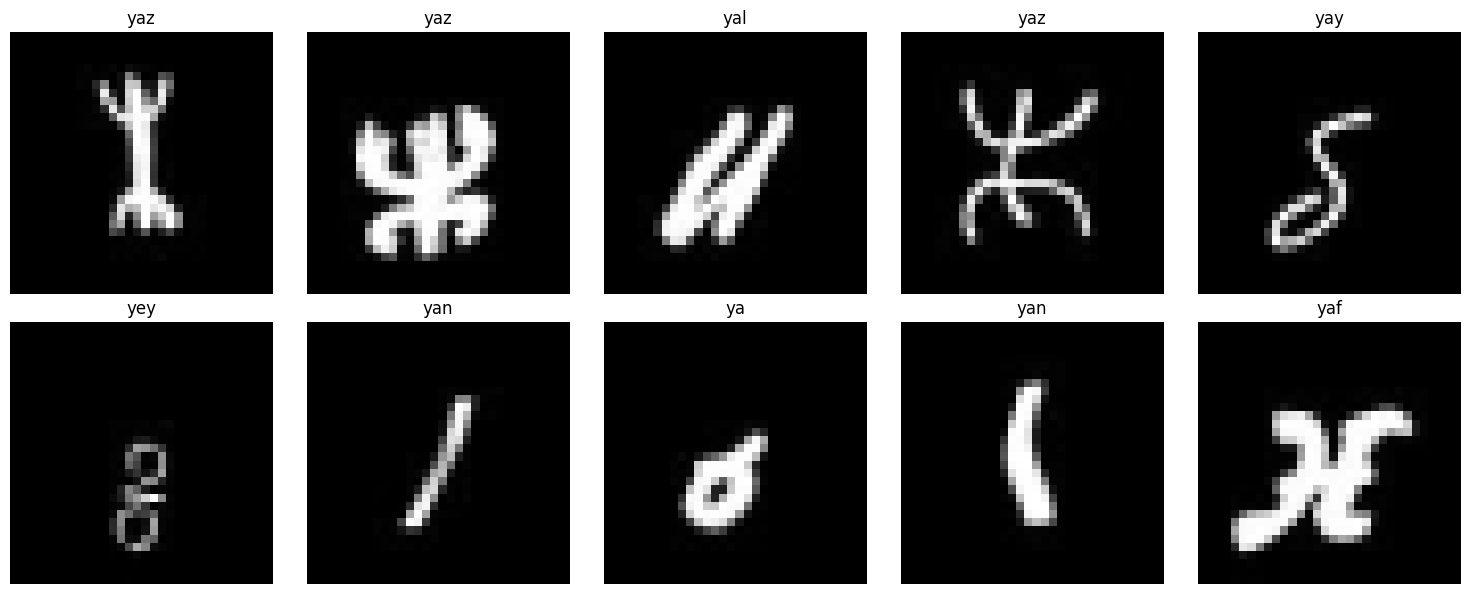


Building LeNet-5 model for 33 classes...

Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ C1 (Conv2D)                     │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S2 (AveragePooling2D)           │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C3 (Conv2D)                     │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S4 (AveragePooling2D)           │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C5 (Dense)                      │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ F6 (Dense)                      │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 33)             │         2,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,661 (248.68 KB)

 Trainable params: 63,661 (248.68 KB)

 Non-trainable params: 0 (0.00 B)


Starting training...
Epoch 1/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.4143 - loss: 2.1126 - val_accuracy: 0.7357 - val_loss: 0.9375 - learning_rate: 0.0010
Epoch 2/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.7817 - loss: 0.7780 - val_accuracy: 0.8639 - val_loss: 0.4862 - learning_rate: 0.0010
Epoch 3/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8776 - loss: 0.4364 - val_accuracy: 0.8953 - val_loss: 0.3414 - learning_rate: 0.0010
Epoch 4/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9284 - loss: 0.2654 - val_accuracy: 0.9366 - val_loss: 0.2338 - learning_rate: 0.0010
Epoch 5/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9490 - loss: 0.1891 - val_accuracy: 0.9463 - val_loss: 0.1949 - learning_rate: 0.0010
Epoch 6/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9555 - loss: 0.1598 - val_accuracy: 0.9610 - val_loss: 0.1421 - learning_rate: 0.0010
Epoch 7/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step 

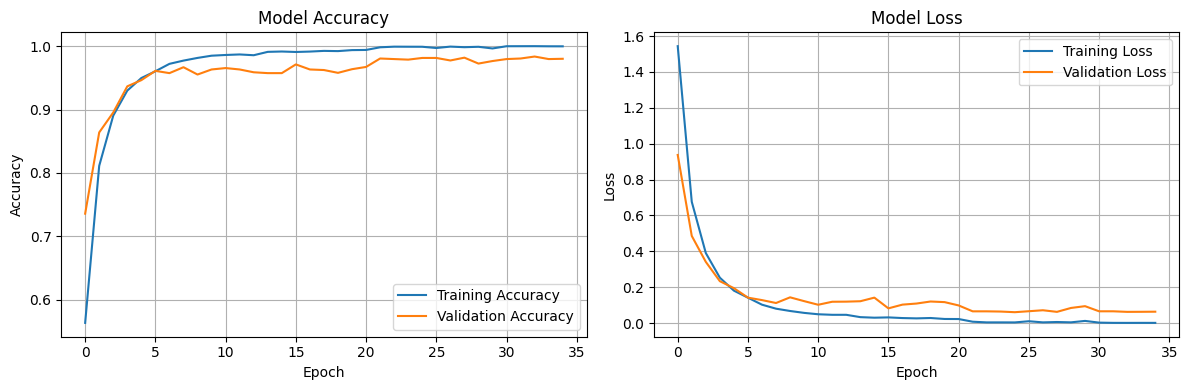


Evaluating on test set...


Test Accuracy: 0.9810
Test Loss: 0.0582
Model saved to lenet5_tifinagh_model.h5

Making predictions on test samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


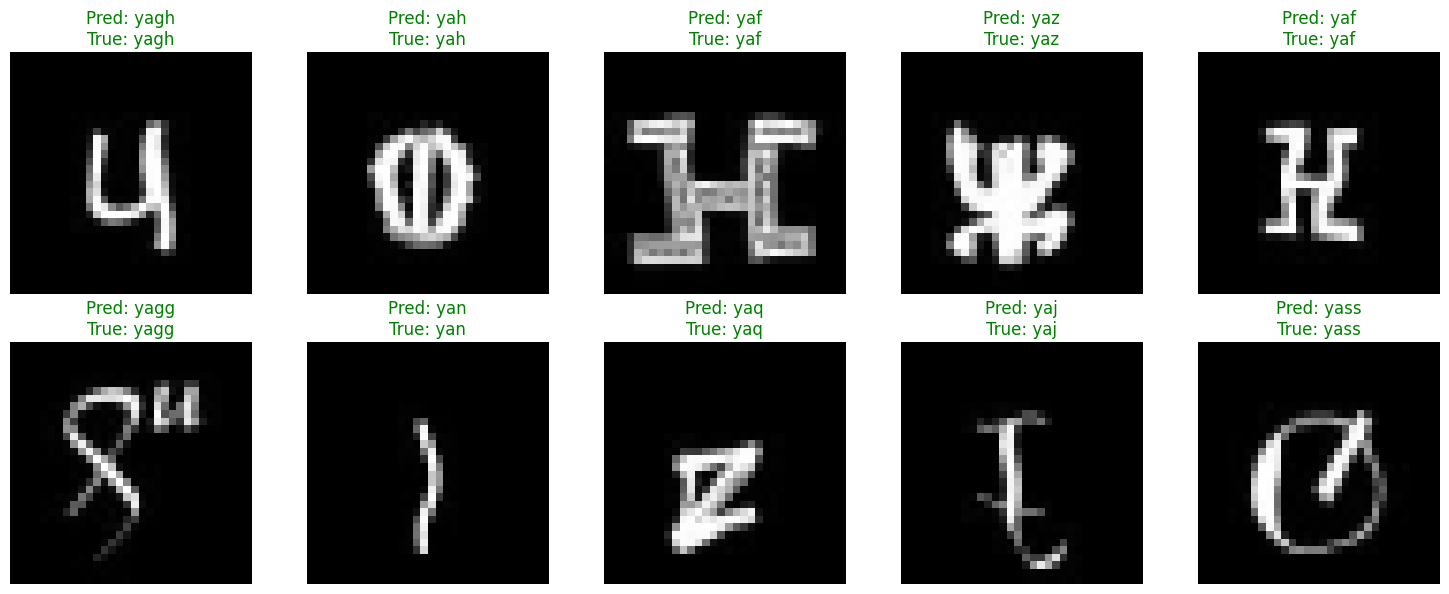


Training completed successfully!
Model saved as: lenet5_tifinagh_model.h5


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
from pathlib import Path
import seaborn as sns
from collections import Counter

class TifinaghDataLoader:
    """Data loader for Tifinagh characters dataset"""

    def __init__(self, data_dir, target_size=(32, 32)):
        self.data_dir = data_dir
        self.target_size = target_size
        self.label_encoder = LabelEncoder()

    def load_dataset(self, test_size=0.2, validation_size=0.1):
        """Load and preprocess the Tifinagh dataset"""
        print(f"Loading dataset from: {self.data_dir}")

        images = []
        labels = []
        class_names = []

        # Get all class directories
        class_dirs = [d for d in os.listdir(self.data_dir)
                     if os.path.isdir(os.path.join(self.data_dir, d))]
        class_dirs.sort()

        print(f"Found {len(class_dirs)} classes: {class_dirs}")

        # Load images from each class
        for class_name in class_dirs:
            class_path = os.path.join(self.data_dir, class_name)
            class_images = []

            # Get all image files in the class directory
            image_files = []
            for ext in ['*.png', '*.jpg', '*.jpeg', '*.bmp', '*.tiff']:
                image_files.extend(Path(class_path).glob(ext))
                image_files.extend(Path(class_path).glob(ext.upper()))

            print(f"Class '{class_name}': {len(image_files)} images")

            for image_path in image_files:
                try:
                    # Load and preprocess image
                    image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
                    if image is not None:
                        # Resize to target size
                        image = cv2.resize(image, self.target_size)
                        # Normalize to [0, 1]
                        image = image.astype(np.float32) / 255.0

                        images.append(image)
                        labels.append(class_name)

                except Exception as e:
                    print(f"Error loading {image_path}: {e}")
                    continue

        if not images:
            raise ValueError("No images found in the dataset!")

        # Convert to numpy arrays
        X = np.array(images)
        y = np.array(labels)

        # Add channel dimension for grayscale images
        X = np.expand_dims(X, axis=-1)

        # Encode labels
        y_encoded = self.label_encoder.fit_transform(y)

        print(f"Dataset loaded: {X.shape[0]} images, {len(np.unique(y_encoded))} classes")
        print(f"Image shape: {X.shape[1:]}")

        # Split into train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=test_size, stratify=y_encoded, random_state=42
        )

        # Split train into train/validation
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=validation_size, stratify=y_train, random_state=42
        )

        # Convert labels to categorical
        num_classes = len(np.unique(y_encoded))
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_val = keras.utils.to_categorical(y_val, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        print(f"Train set: {X_train.shape[0]} samples")
        print(f"Validation set: {X_val.shape[0]} samples")
        print(f"Test set: {X_test.shape[0]} samples")

        return (X_train, y_train), (X_val, y_val), (X_test, y_test), num_classes

    def get_class_names(self):
        """Get class names"""
        return self.label_encoder.classes_

    def plot_sample_images(self, X, y, class_names, num_samples=10):
        """Plot sample images from the dataset"""
        fig, axes = plt.subplots(2, 5, figsize=(15, 6))
        axes = axes.ravel()

        for i in range(min(num_samples, len(X))):
            axes[i].imshow(X[i].squeeze(), cmap='gray')
            class_idx = np.argmax(y[i])
            axes[i].set_title(f'{class_names[class_idx]}')
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

class LeNet5Model:
    """LeNet-5 CNN Architecture for Tifinagh Character Recognition"""

    def __init__(self, num_classes, input_shape=(32, 32, 1)):
        self.num_classes = num_classes
        self.input_shape = input_shape
        self.model = None
        self.history = None

    def build_model(self, activation='tanh'):
        """
        Build LeNet-5 architecture:
        - Input: 32×32 grayscale image
        - C1: 6 filters 5×5 → 28×28×6
        - S2: Average pooling 2×2 → 14×14×6
        - C3: 16 filters 5×5 → 10×10×16
        - S4: Average pooling 2×2 → 5×5×16
        - C5: Fully connected 120 neurons
        - F6: Fully connected 84 neurons
        - Output: num_classes neurons
        """

        model = keras.Sequential([
            # Input layer
            layers.Input(shape=self.input_shape),

            # C1: Convolution layer - 6 filters of 5×5
            layers.Conv2D(6, (5, 5), activation=activation, padding='valid', name='C1'),
            # Output: 28×28×6

            # S2: Average pooling 2×2
            layers.AveragePooling2D((2, 2), strides=2, name='S2'),
            # Output: 14×14×6

            # C3: Convolution layer - 16 filters of 5×5
            layers.Conv2D(16, (5, 5), activation=activation, padding='valid', name='C3'),
            # Output: 10×10×16

            # S4: Average pooling 2×2
            layers.AveragePooling2D((2, 2), strides=2, name='S4'),
            # Output: 5×5×16

            # Flatten for fully connected layers
            layers.Flatten(),

            # C5: Fully connected layer - 120 neurons
            layers.Dense(120, activation=activation, name='C5'),

            # F6: Fully connected layer - 84 neurons
            layers.Dense(84, activation=activation, name='F6'),

            # Output layer - num_classes neurons
            layers.Dense(self.num_classes, activation='softmax', name='Output')
        ])

        self.model = model
        return model

    def compile_model(self, optimizer='adam', learning_rate=0.001):
        """Compile the model"""
        if optimizer == 'adam':
            opt = keras.optimizers.Adam(learning_rate=learning_rate)
        elif optimizer == 'sgd':
            opt = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
        else:
            opt = optimizer

        self.model.compile(
            optimizer=opt,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

    def train(self, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
        """Train the model"""

        # Callbacks
        callbacks = [
            keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            ),
            keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=5,
                min_lr=1e-7
            )
        ]

        # Train the model
        self.history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_val, y_val),
            callbacks=callbacks,
            verbose=1
        )

        return self.history

    def evaluate(self, X_test, y_test):
        """Evaluate the model"""
        return self.model.evaluate(X_test, y_test, verbose=0)

    def predict(self, X):
        """Make predictions"""
        return self.model.predict(X)

    def plot_training_history(self):
        """Plot training history"""
        if self.history is None:
            print("No training history available!")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot training & validation accuracy
        ax1.plot(self.history.history['accuracy'], label='Training Accuracy')
        ax1.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        ax1.set_title('Model Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        ax1.grid(True)

        # Plot training & validation loss
        ax2.plot(self.history.history['loss'], label='Training Loss')
        ax2.plot(self.history.history['val_loss'], label='Validation Loss')
        ax2.set_title('Model Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

    def save_model(self, filepath):
        """Save the trained model"""
        self.model.save(filepath)
        print(f"Model saved to {filepath}")

    def load_model(self, filepath):
        """Load a trained model"""
        self.model = keras.models.load_model(filepath)
        print(f"Model loaded from {filepath}")

def main():
    """Main training pipeline"""

    # Dataset configuration
    data_dir = os.path.join(os.getcwd(), 'amhcd-data-64/tifinagh-images/')
    print(f"Dataset directory: {data_dir}")
    print(f"Current working directory: {os.getcwd()}")

    # Check if dataset exists
    if not os.path.exists(data_dir):
        print(f"Dataset directory not found: {data_dir}")
        print("Please make sure the dataset is in the correct location.")
        return

    # Load dataset
    data_loader = TifinaghDataLoader(data_dir, target_size=(32, 32))

    try:
        (X_train, y_train), (X_val, y_val), (X_test, y_test), num_classes = data_loader.load_dataset()
        class_names = data_loader.get_class_names()

        print(f"\nDataset Summary:")
        print(f"Number of classes: {num_classes}")
        print(f"Class names: {class_names}")

        # Plot sample images
        print("\nDisplaying sample images...")
        data_loader.plot_sample_images(X_train, y_train, class_names)

        # Create and build model
        print(f"\nBuilding LeNet-5 model for {num_classes} classes...")
        lenet = LeNet5Model(num_classes=num_classes)

        # Build with tanh activation (original LeNet-5)
        model = lenet.build_model(activation='tanh')

        # Print model architecture
        print("\nModel Architecture:")
        model.summary()

        # Compile model
        lenet.compile_model(optimizer='adam', learning_rate=0.001)

        # Train model
        print("\nStarting training...")
        history = lenet.train(
            X_train, y_train,
            X_val, y_val,
            epochs=50,
            batch_size=32
        )

        # Plot training history
        lenet.plot_training_history()

        # Evaluate on test set
        print("\nEvaluating on test set...")
        test_loss, test_accuracy = lenet.evaluate(X_test, y_test)
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}")

        # Save model
        model_path = 'lenet5_tifinagh_model.h5'
        lenet.save_model(model_path)

        # Make predictions on test set
        print("\nMaking predictions on test samples...")
        predictions = lenet.predict(X_test[:10])

        # Show predictions
        fig, axes = plt.subplots(2, 5, figsize=(15, 6))
        axes = axes.ravel()

        for i in range(10):
            axes[i].imshow(X_test[i].squeeze(), cmap='gray')
            pred_class = np.argmax(predictions[i])
            true_class = np.argmax(y_test[i])

            title = f'Pred: {class_names[pred_class]}\nTrue: {class_names[true_class]}'
            color = 'green' if pred_class == true_class else 'red'
            axes[i].set_title(title, color=color)
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

        print(f"\nTraining completed successfully!")
        print(f"Model saved as: {model_path}")

    except Exception as e:
        print(f"Error during training: {e}")
        print("Please check your dataset structure and file paths.")

if __name__ == "__main__":
    main()

# Alternative: Modern LeNet-5 with ReLU activation
def create_modern_lenet5(num_classes, input_shape=(32, 32, 1)):
    """Create a modern version of LeNet-5 with ReLU and BatchNorm"""

    model = keras.Sequential([
        layers.Input(shape=input_shape),

        # C1: Conv layer with ReLU
        layers.Conv2D(6, (5, 5), padding='valid', name='C1'),
        layers.BatchNormalization(),
        layers.ReLU(),

        # S2: Average pooling
        layers.AveragePooling2D((2, 2), strides=2, name='S2'),

        # C3: Conv layer with ReLU
        layers.Conv2D(16, (5, 5), padding='valid', name='C3'),
        layers.BatchNormalization(),
        layers.ReLU(),

        # S4: Average pooling
        layers.AveragePooling2D((2, 2), strides=2, name='S4'),

        # Flatten
        layers.Flatten(),

        # C5: Dense layer with ReLU and Dropout
        layers.Dense(120, name='C5'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.5),

        # F6: Dense layer with ReLU and Dropout
        layers.Dense(84, name='F6'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.5),

        # Output layer
        layers.Dense(num_classes, activation='softmax', name='Output')
    ])

    return model

# Usage example for the modern version:
# model = create_modern_lenet5(num_classes=33)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
from pathlib import Path
import seaborn as sns
from collections import Counter

class LayerVisualizer:
    """Visualisateur pour les sorties des couches du réseau LeNet-5"""

    def __init__(self, model):
        self.model = model
        self.layer_outputs = None
        self.activation_model = None
        self._create_activation_model()

    def _create_activation_model(self):
        """Crée un modèle qui retourne les sorties de toutes les couches"""
        layer_outputs = []
        layer_names = []

        for layer in self.model.layers:
            if hasattr(layer, 'output'):
                layer_outputs.append(layer.output)
                layer_names.append(layer.name)

        self.layer_names = layer_names
        self.activation_model = keras.Model(inputs=self.model.input, outputs=layer_outputs)

    def get_layer_activations(self, input_image):
        """Obtient les activations de toutes les couches pour une image donnée"""
        # S'assurer que l'image a la bonne forme (batch_size, height, width, channels)
        if len(input_image.shape) == 3:
            input_image = np.expand_dims(input_image, axis=0)

        activations = self.activation_model.predict(input_image, verbose=0)
        return activations

    def visualize_conv_layers(self, input_image, figsize=(20, 15)):
        """Visualise les couches de convolution et leurs feature maps"""
        activations = self.get_layer_activations(input_image)

        # Identifier les couches de convolution
        conv_layers = []
        conv_activations = []

        for i, (layer, activation) in enumerate(zip(self.model.layers, activations)):
            if isinstance(layer, layers.Conv2D):
                conv_layers.append((i, layer.name, layer))
                conv_activations.append(activation)

        if not conv_layers:
            print("Aucune couche de convolution trouvée!")
            return

        # Créer la figure
        n_layers = len(conv_layers)
        fig = plt.figure(figsize=figsize)

        # Image originale
        plt.subplot(n_layers + 1, 1, 1)
        if len(input_image.shape) == 4:
            img_to_show = input_image[0].squeeze()
        else:
            img_to_show = input_image.squeeze()
        plt.imshow(img_to_show, cmap='gray')
        plt.title('Image d\'entrée', fontsize=14, fontweight='bold')
        plt.axis('off')

        # Visualiser chaque couche de convolution
        for layer_idx, (orig_idx, layer_name, layer) in enumerate(conv_layers):
            activation = conv_activations[layer_idx][0]  # Première image du batch
            n_features = activation.shape[-1]

            # Calculer la grille pour afficher les feature maps
            n_cols = min(8, n_features)
            n_rows = (n_features + n_cols - 1) // n_cols

            plt.subplot(n_layers + 1, 1, layer_idx + 2)

            # Créer une grande image pour tous les feature maps
            feature_map_size = activation.shape[:2]
            display_grid = np.zeros((feature_map_size[0] * n_rows, feature_map_size[1] * n_cols))

            for i in range(n_features):
                row = i // n_cols
                col = i % n_cols

                # Normaliser le feature map
                feature_map = activation[:, :, i]
                feature_map -= feature_map.mean()
                if feature_map.std() > 0:
                    feature_map /= feature_map.std()
                feature_map *= 64
                feature_map += 128
                feature_map = np.clip(feature_map, 0, 255).astype('uint8')

                # Placer dans la grille
                display_grid[row * feature_map_size[0]:(row + 1) * feature_map_size[0],
                           col * feature_map_size[1]:(col + 1) * feature_map_size[1]] = feature_map

            plt.imshow(display_grid, cmap='viridis')
            plt.title(f'{layer_name} - {n_features} feature maps ({feature_map_size[0]}x{feature_map_size[1]})',
                     fontsize=12, fontweight='bold')
            plt.axis('off')

        plt.tight_layout()
        plt.show()

    def visualize_individual_features(self, input_image, layer_name, max_features=16, figsize=(15, 10)):
        """Visualise individuellement les feature maps d'une couche spécifique"""
        activations = self.get_layer_activations(input_image)

        # Trouver la couche demandée
        layer_idx = -1
        for i, layer in enumerate(self.model.layers):
            if layer.name == layer_name:
                layer_idx = i
                break

        if layer_idx == -1:
            print(f"Couche '{layer_name}' non trouvée!")
            print(f"Couches disponibles: {[layer.name for layer in self.model.layers]}")
            return

        if not isinstance(self.model.layers[layer_idx], layers.Conv2D):
            print(f"La couche '{layer_name}' n'est pas une couche de convolution!")
            return

        activation = activations[layer_idx][0]  # Première image du batch
        n_features = min(activation.shape[-1], max_features)

        # Calculer la grille
        cols = 4
        rows = (n_features + cols - 1) // cols

        fig, axes = plt.subplots(rows, cols, figsize=figsize)
        if rows == 1:
            axes = axes.reshape(1, -1)

        for i in range(n_features):
            row = i // cols
            col = i % cols

            feature_map = activation[:, :, i]

            axes[row, col].imshow(feature_map, cmap='viridis')
            axes[row, col].set_title(f'Feature {i+1}')
            axes[row, col].axis('off')

        # Masquer les axes non utilisés
        for i in range(n_features, rows * cols):
            row = i // cols
            col = i % cols
            axes[row, col].axis('off')

        plt.suptitle(f'Feature Maps de la couche: {layer_name}', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

    def visualize_dense_layers(self, input_image, figsize=(15, 8)):
        """Visualise les activations des couches denses"""
        activations = self.get_layer_activations(input_image)

        # Identifier les couches denses
        dense_layers = []
        dense_activations = []

        for i, (layer, activation) in enumerate(zip(self.model.layers, activations)):
            if isinstance(layer, layers.Dense):
                dense_layers.append((i, layer.name, layer))
                dense_activations.append(activation[0])  # Première image du batch

        if not dense_layers:
            print("Aucune couche dense trouvée!")
            return

        # Créer la visualisation
        n_layers = len(dense_layers)
        fig, axes = plt.subplots(1, n_layers, figsize=figsize)

        if n_layers == 1:
            axes = [axes]

        for i, (orig_idx, layer_name, layer) in enumerate(dense_layers):
            activation = dense_activations[i]

            # Créer un heatmap des activations
            activation_2d = activation.reshape(-1, 1)

            im = axes[i].imshow(activation_2d.T, cmap='viridis', aspect='auto')
            axes[i].set_title(f'{layer_name}\n({len(activation)} neurones)')
            axes[i].set_xlabel('Neurone')
            axes[i].set_yticks([])

            # Ajouter une colorbar
            plt.colorbar(im, ax=axes[i])

        plt.tight_layout()
        plt.show()

    def analyze_layer_statistics(self, input_image):
        """Analyse statistique des activations de chaque couche"""
        activations = self.get_layer_activations(input_image)

        stats = []
        for i, (layer, activation) in enumerate(zip(self.model.layers, activations)):
            if len(activation.shape) > 1:  # Ignorer les couches sans sortie
                activation_flat = activation[0].flatten()  # Première image du batch

                layer_stats = {
                    'layer_name': layer.name,
                    'layer_type': type(layer).__name__,
                    'output_shape': activation[0].shape,
                    'n_parameters': layer.count_params() if hasattr(layer, 'count_params') else 0,
                    'mean_activation': np.mean(activation_flat),
                    'std_activation': np.std(activation_flat),
                    'min_activation': np.min(activation_flat),
                    'max_activation': np.max(activation_flat),
                    'sparsity': np.mean(activation_flat == 0) * 100  # % de zéros
                }
                stats.append(layer_stats)

        # Afficher les statistiques
        print("Statistiques des activations par couche:")
        print("-" * 80)
        print(f"{'Couche':<15} {'Type':<12} {'Shape':<15} {'Moyenne':<10} {'Écart-type':<10} {'Min':<8} {'Max':<8} {'Sparsité %':<10}")
        print("-" * 80)

        for stat in stats:
            print(f"{stat['layer_name']:<15} "
                  f"{stat['layer_type']:<12} "
                  f"{str(stat['output_shape']):<15} "
                  f"{stat['mean_activation']:<10.4f} "
                  f"{stat['std_activation']:<10.4f} "
                  f"{stat['min_activation']:<8.4f} "
                  f"{stat['max_activation']:<8.4f} "
                  f"{stat['sparsity']:<10.2f}")

        return stats

    def visualize_complete_forward_pass(self, input_image, figsize=(20, 25)):
        """Visualisation complète du passage avant dans le réseau"""
        print("Visualisation complète du passage avant...")

        # 1. Statistiques des couches
        print("\n1. Analyse statistique des activations:")
        self.analyze_layer_statistics(input_image)

        # 2. Couches de convolution
        print("\n2. Visualisation des couches de convolution:")
        self.visualize_conv_layers(input_image, figsize=(20, 12))

        # 3. Couches denses
        print("\n3. Visualisation des couches denses:")
        self.visualize_dense_layers(input_image, figsize=(15, 6))


# Fonction d'aide pour utiliser le visualisateur avec votre code existant
def visualize_model_layers(model, X_test, y_test, class_names, sample_idx=0):
    """
    Fonction pour visualiser les couches d'un modèle entraîné

    Args:
        model: Modèle Keras entraîné
        X_test: Images de test
        y_test: Labels de test
        class_names: Noms des classes
        sample_idx: Index de l'image à analyser
    """

    # Créer le visualisateur
    visualizer = LayerVisualizer(model)

    # Sélectionner une image de test
    test_image = X_test[sample_idx:sample_idx+1]
    true_label = np.argmax(y_test[sample_idx])

    print(f"Analyse de l'image {sample_idx}")
    print(f"Vraie classe: {class_names[true_label]}")

    # Faire une prédiction
    prediction = model.predict(test_image, verbose=0)
    predicted_class = np.argmax(prediction[0])
    confidence = np.max(prediction[0])

    print(f"Prédiction: {class_names[predicted_class]} (confiance: {confidence:.4f})")
    print("-" * 50)

    # Visualisation complète
    visualizer.visualize_complete_forward_pass(test_image)

    # Visualisation détaillée des couches de convolution individuelles
    conv_layers = ['C1', 'C3']  # Noms des couches de convolution dans LeNet-5

    for layer_name in conv_layers:
        try:
            print(f"\n4. Détail de la couche {layer_name}:")
            visualizer.visualize_individual_features(test_image, layer_name, max_features=16)
        except Exception as e:
            print(f"Erreur lors de la visualisation de {layer_name}: {e}")

    return visualizer


# Exemple d'utilisation avec votre code principal
def main_with_visualization():
    """Version modifiée du main() avec visualisation des couches"""

    # [Votre code de chargement des données reste identique jusqu'à l'entraînement]
    data_dir = os.path.join(os.getcwd(), 'amhcd-data-64/tifinagh-images/')

    if not os.path.exists(data_dir):
        print(f"Dataset directory not found: {data_dir}")
        return

    # Charger les données
    data_loader = TifinaghDataLoader(data_dir, target_size=(32, 32))
    (X_train, y_train), (X_val, y_val), (X_test, y_test), num_classes = data_loader.load_dataset()
    class_names = data_loader.get_class_names()

    # Créer et entraîner le modèle (votre code existant)
    lenet = LeNet5Model(num_classes=num_classes)
    model = lenet.build_model(activation='tanh')
    lenet.compile_model(optimizer='adam', learning_rate=0.001)

    # Entraîner (vous pouvez réduire les époques pour les tests)
    history = lenet.train(X_train, y_train, X_val, y_val, epochs=10, batch_size=32)

    # Évaluation
    test_loss, test_accuracy = lenet.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # NOUVELLE PARTIE: Visualisation des couches
    print("\n" + "="*60)
    print("VISUALISATION DES COUCHES DU RÉSEAU")
    print("="*60)

    # Analyser plusieurs images de test
    for i in range(3):  # Analyser 3 images différentes
        print(f"\n{'='*20} IMAGE {i+1} {'='*20}")
        visualizer = visualize_model_layers(model, X_test, y_test, class_names, sample_idx=i)

    return model, visualizer


if __name__ == "__main__":
    # Utiliser la version avec visualisation
    main_with_visualization()

Loading dataset from: /content/amhcd-data-64/tifinagh-images/
Found 33 classes: ['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagg', 'yagh', 'yah', 'yahh', 'yaj', 'yak', 'yakk', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
Class 'ya': 854 images
Class 'yab': 854 images
Class 'yach': 854 images
Class 'yad': 854 images
Class 'yadd': 854 images
Class 'yae': 854 images
Class 'yaf': 854 images
Class 'yag': 854 images
Class 'yagg': 854 images
Class 'yagh': 854 images
Class 'yah': 854 images
Class 'yahh': 854 images
Class 'yaj': 854 images
Class 'yak': 854 images
Class 'yakk': 854 images
Class 'yal': 854 images
Class 'yam': 854 images
Class 'yan': 854 images
Class 'yaq': 854 images
Class 'yar': 854 images
Class 'yarr': 854 images
Class 'yas': 854 images
Class 'yass': 854 images
Class 'yat': 854 images
Class 'yatt': 854 images
Class 'yaw': 854 images
Class 'yax': 854 images
Class 'yay': 854 images
C

AttributeError: The layer sequential_2 has never been called and thus has no defined input.

Dataset directory: /content/amhcd-data-64/tifinagh-images/
Current working directory: /content
Loading dataset from: /content/amhcd-data-64/tifinagh-images/
Found 33 classes: ['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagg', 'yagh', 'yah', 'yahh', 'yaj', 'yak', 'yakk', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
Class 'ya': 854 images
Class 'yab': 854 images
Class 'yach': 854 images
Class 'yad': 854 images
Class 'yadd': 854 images
Class 'yae': 854 images
Class 'yaf': 854 images
Class 'yag': 854 images
Class 'yagg': 854 images
Class 'yagh': 854 images
Class 'yah': 854 images
Class 'yahh': 854 images
Class 'yaj': 854 images
Class 'yak': 854 images
Class 'yakk': 854 images
Class 'yal': 854 images
Class 'yam': 854 images
Class 'yan': 854 images
Class 'yaq': 854 images
Class 'yar': 854 images
Class 'yarr': 854 images
Class 'yas': 854 images
Class 'yass': 854 images
Class 'yat': 854 images
Cla

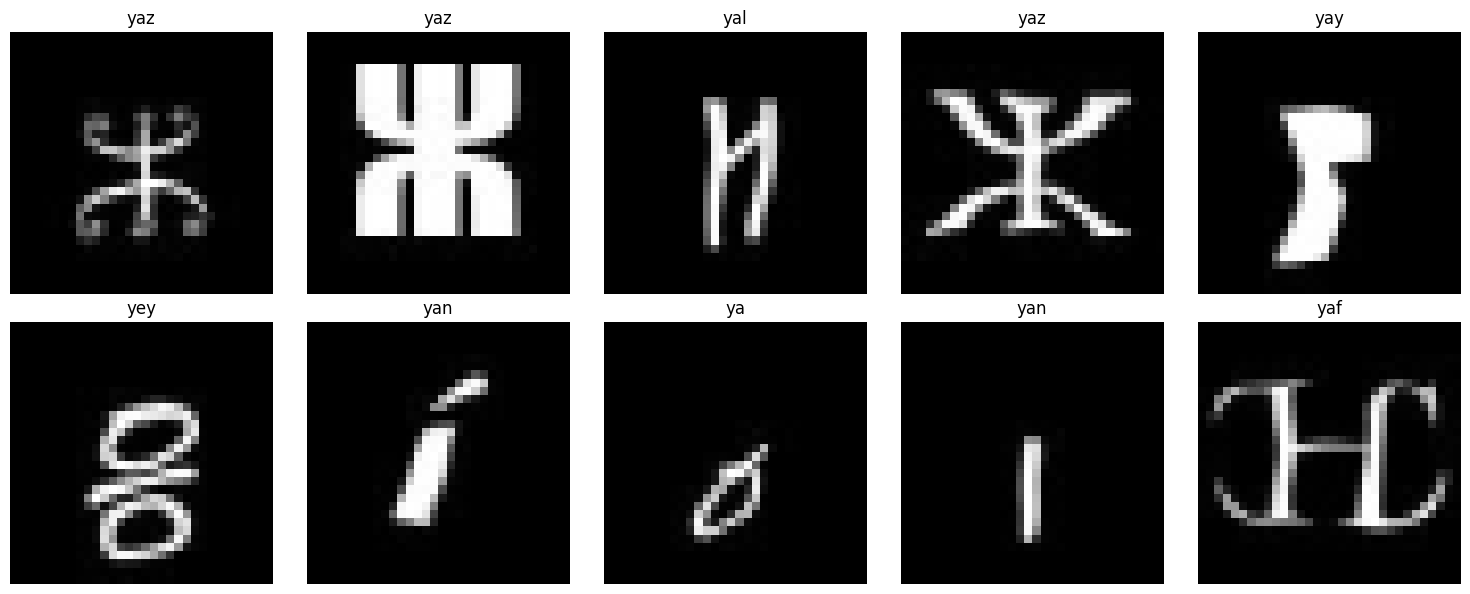


Building LeNet-5 model for 33 classes...

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ C1 (Conv2D)                     │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S2 (AveragePooling2D)           │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C3 (Conv2D)                     │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S4 (AveragePooling2D)           │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C5 (Dense)                      │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ F6 (Dense)                      │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 33)             │         2,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,661 (248.68 KB)

 Trainable params: 63,661 (248.68 KB)

 Non-trainable params: 0 (0.00 B)


Starting training...
Epoch 1/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.3991 - loss: 2.1617 - val_accuracy: 0.7095 - val_loss: 0.9255 - learning_rate: 0.0010
Epoch 2/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.7869 - loss: 0.7447 - val_accuracy: 0.8563 - val_loss: 0.4739 - learning_rate: 0.0010
Epoch 3/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8888 - loss: 0.3977 - val_accuracy: 0.9113 - val_loss: 0.2970 - learning_rate: 0.0010
Epoch 4/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9323 - loss: 0.2466 - val_accuracy: 0.9317 - val_loss: 0.2297 - learning_rate: 0.0010
Epoch 5/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9414 - loss: 0.2085 - val_accuracy: 0.9406 - val_loss: 0.1820 - learning_rate: 0.0010
Epoch 6/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9599 - loss: 0.1381 - val_accuracy: 0.9503 - val_loss: 0.1469 - learning_rate: 0.0010
Epoch 7/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step 

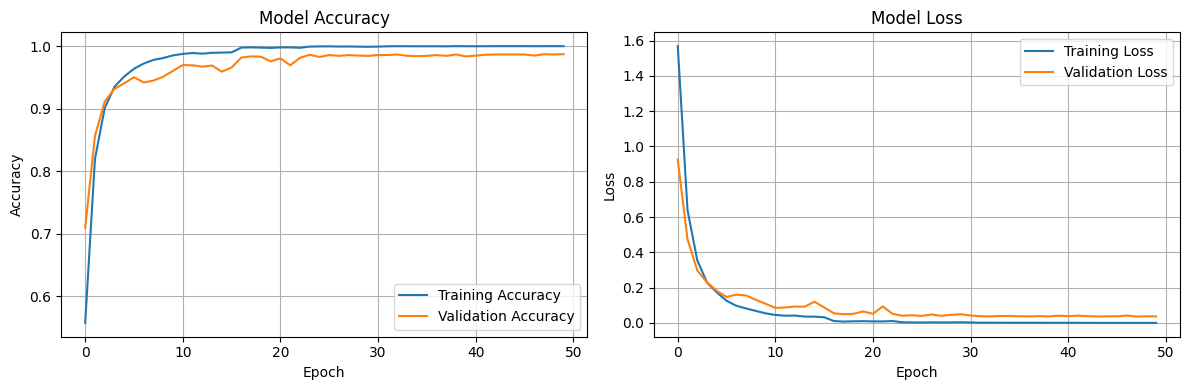


Evaluating on test set...
Test Accuracy: 0.9826
Test Loss: 0.0542

Visualizing convolutional filters...

Visualizing filters for layer: C1


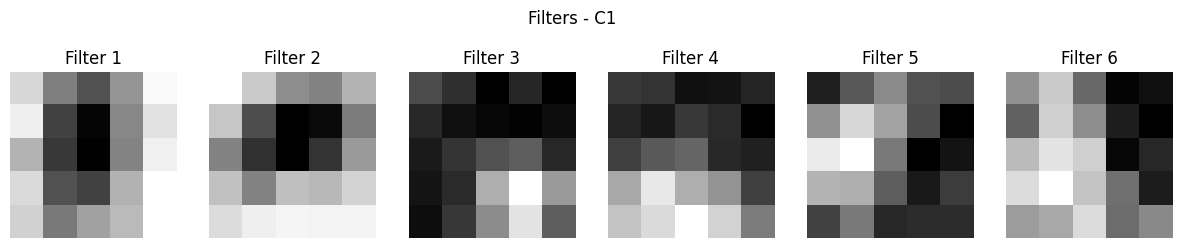


Visualizing filters for layer: C3


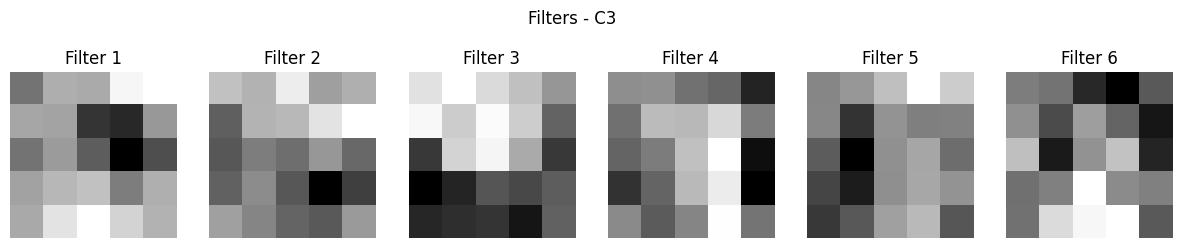


Visualizing layer outputs for test image (class: yagh)...


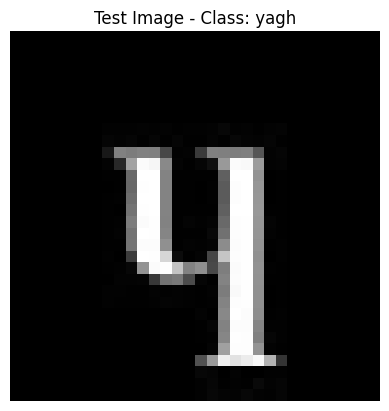

Error during training: The layer sequential has never been called and thus has no defined input.
Please check your dataset structure and file paths.


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
from pathlib import Path

class TifinaghDataLoader:
    """Data loader for Tifinagh characters dataset"""

    def __init__(self, data_dir, target_size=(32, 32)):
        self.data_dir = data_dir
        self.target_size = target_size
        self.label_encoder = LabelEncoder()

    def load_dataset(self, test_size=0.2, validation_size=0.1):
        """Load and preprocess the Tifinagh dataset"""
        print(f"Loading dataset from: {self.data_dir}")

        images = []
        labels = []
        class_names = []

        # Get all class directories
        class_dirs = [d for d in os.listdir(self.data_dir)
                     if os.path.isdir(os.path.join(self.data_dir, d))]
        class_dirs.sort()

        print(f"Found {len(class_dirs)} classes: {class_dirs}")

        # Load images from each class
        for class_name in class_dirs:
            class_path = os.path.join(self.data_dir, class_name)
            class_images = []

            # Get all image files in the class directory
            image_files = []
            for ext in ['*.png', '*.jpg', '*.jpeg', '*.bmp', '*.tiff']:
                image_files.extend(Path(class_path).glob(ext))
                image_files.extend(Path(class_path).glob(ext.upper()))

            print(f"Class '{class_name}': {len(image_files)} images")

            for image_path in image_files:
                try:
                    # Load and preprocess image
                    image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
                    if image is not None:
                        # Resize to target size
                        image = cv2.resize(image, self.target_size)
                        # Normalize to [0, 1]
                        image = image.astype(np.float32) / 255.0

                        images.append(image)
                        labels.append(class_name)

                except Exception as e:
                    print(f"Error loading {image_path}: {e}")
                    continue

        if not images:
            raise ValueError("No images found in the dataset!")

        # Convert to numpy arrays
        X = np.array(images)
        y = np.array(labels)

        # Add channel dimension for grayscale images
        X = np.expand_dims(X, axis=-1)

        # Encode labels
        y_encoded = self.label_encoder.fit_transform(y)

        print(f"Dataset loaded: {X.shape[0]} images, {len(np.unique(y_encoded))} classes")
        print(f"Image shape: {X.shape[1:]}")

        # Split into train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=test_size, stratify=y_encoded, random_state=42
        )

        # Split train into train/validation
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=validation_size, stratify=y_train, random_state=42
        )

        # Convert labels to categorical
        num_classes = len(np.unique(y_encoded))
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_val = keras.utils.to_categorical(y_val, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        print(f"Train set: {X_train.shape[0]} samples")
        print(f"Validation set: {X_val.shape[0]} samples")
        print(f"Test set: {X_test.shape[0]} samples")

        return (X_train, y_train), (X_val, y_val), (X_test, y_test), num_classes

    def get_class_names(self):
        """Get class names"""
        return self.label_encoder.classes_

    def plot_sample_images(self, X, y, class_names, num_samples=10):
        """Plot sample images from the dataset"""
        fig, axes = plt.subplots(2, 5, figsize=(15, 6))
        axes = axes.ravel()

        for i in range(min(num_samples, len(X))):
            axes[i].imshow(X[i].squeeze(), cmap='gray')
            class_idx = np.argmax(y[i])
            axes[i].set_title(f'{class_names[class_idx]}')
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

class LeNet5Model:
    """LeNet-5 CNN Architecture for Tifinagh Character Recognition"""

    def __init__(self, num_classes, input_shape=(32, 32, 1)):
        self.num_classes = num_classes
        self.input_shape = input_shape
        self.model = None
        self.history = None

    def build_model(self, activation='tanh'):
        """
        Build LeNet-5 architecture:
        - Input: 32×32 grayscale image
        - C1: 6 filters 5×5 → 28×28×6
        - S2: Average pooling 2×2 → 14×14×6
        - C3: 16 filters 5×5 → 10×10×16
        - S4: Average pooling 2×2 → 5×5×16
        - C5: Fully connected 120 neurons
        - F6: Fully connected 84 neurons
        - Output: num_classes neurons
        """

        model = keras.Sequential([
            # Input layer
            layers.Input(shape=self.input_shape),

            # C1: Convolution layer - 6 filters of 5×5
            layers.Conv2D(6, (5, 5), activation=activation, padding='valid', name='C1'),
            # Output: 28×28×6

            # S2: Average pooling 2×2
            layers.AveragePooling2D((2, 2), strides=2, name='S2'),
            # Output: 14×14×6

            # C3: Convolution layer - 16 filters of 5×5
            layers.Conv2D(16, (5, 5), activation=activation, padding='valid', name='C3'),
            # Output: 10×10×16

            # S4: Average pooling 2×2
            layers.AveragePooling2D((2, 2), strides=2, name='S4'),
            # Output: 5×5×16

            # Flatten for fully connected layers
            layers.Flatten(),

            # C5: Fully connected layer - 120 neurons
            layers.Dense(120, activation=activation, name='C5'),

            # F6: Fully connected layer - 84 neurons
            layers.Dense(84, activation=activation, name='F6'),

            # Output layer - num_classes neurons
            layers.Dense(self.num_classes, activation='softmax', name='Output')
        ])

        self.model = model
        return model

    def compile_model(self, optimizer='adam', learning_rate=0.001):
        """Compile the model"""
        if optimizer == 'adam':
            opt = keras.optimizers.Adam(learning_rate=learning_rate)
        elif optimizer == 'sgd':
            opt = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
        else:
            opt = optimizer

        self.model.compile(
            optimizer=opt,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

    def train(self, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
        """Train the model"""

        # Callbacks
        callbacks = [
            keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            ),
            keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=5,
                min_lr=1e-7
            )
        ]

        # Train the model
        self.history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_val, y_val),
            callbacks=callbacks,
            verbose=1
        )

        return self.history

    def evaluate(self, X_test, y_test):
        """Evaluate the model"""
        return self.model.evaluate(X_test, y_test, verbose=0)

    def predict(self, X):
        """Make predictions"""
        return self.model.predict(X)

    def plot_training_history(self):
        """Plot training history"""
        if self.history is None:
            print("No training history available!")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot training & validation accuracy
        ax1.plot(self.history.history['accuracy'], label='Training Accuracy')
        ax1.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        ax1.set_title('Model Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        ax1.grid(True)

        # Plot training & validation loss
        ax2.plot(self.history.history['loss'], label='Training Loss')
        ax2.plot(self.history.history['val_loss'], label='Validation Loss')
        ax2.set_title('Model Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

    def save_model(self, filepath):
        """Save the trained model"""
        self.model.save(filepath)
        print(f"Model saved to {filepath}")

    def load_model(self, filepath):
        """Load a trained model"""
        self.model = keras.models.load_model(filepath)
        print(f"Model loaded from {filepath}")

    def visualize_filters(self):
        """Visualize convolutional filters"""
        for layer in self.model.layers:
            if isinstance(layer, layers.Conv2D):
                print(f"\nVisualizing filters for layer: {layer.name}")
                filters, biases = layer.get_weights()

                # Normalize filter values to 0-1 for visualization
                f_min, f_max = filters.min(), filters.max()
                filters = (filters - f_min) / (f_max - f_min)

                # Plot first few filters
                n_filters = min(6, filters.shape[3])  # Only show first 6 filters
                fig, axes = plt.subplots(1, n_filters, figsize=(15, 3))

                for i in range(n_filters):
                    ax = axes[i] if n_filters > 1 else axes
                    # Get the filter (for grayscale input, only 1 channel)
                    f = filters[:, :, 0, i]
                    ax.imshow(f, cmap='gray')
                    ax.set_title(f'Filter {i+1}')
                    ax.axis('off')

                plt.suptitle(f'Filters - {layer.name}')
                plt.show()

    def visualize_activations(self, test_image, layer_names=None):
        """Visualize layer activations for a test image"""
        if layer_names is None:
            layer_names = [layer.name for layer in self.model.layers
                          if isinstance(layer, (layers.Conv2D, layers.AveragePooling2D))]

        # Create a model that will return these outputs
        outputs = [self.model.get_layer(name).output for name in layer_names]
        activation_model = keras.models.Model(inputs=self.model.input, outputs=outputs)

        # Get activations
        test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
        activations = activation_model.predict(test_image)

        # Plot the activations
        for layer_name, layer_activation in zip(layer_names, activations):
            print(f"\nVisualizing outputs for layer: {layer_name}")
            print(f"Activation shape: {layer_activation.shape}")

            # For Conv/Pooling layers
            if len(layer_activation.shape) == 4:
                n_features = min(6, layer_activation.shape[-1])  # Only show first 6 features
                fig, axes = plt.subplots(1, n_features, figsize=(15, 3))

                for i in range(n_features):
                    ax = axes[i] if n_features > 1 else axes
                    ax.imshow(layer_activation[0, :, :, i], cmap='viridis')
                    ax.set_title(f'Feature {i+1}')
                    ax.axis('off')

                plt.suptitle(f'Feature Maps - {layer_name}')
                plt.show()

def main():
    """Main training pipeline"""

    # Dataset configuration
    data_dir = os.path.join(os.getcwd(), 'amhcd-data-64/tifinagh-images/')
    print(f"Dataset directory: {data_dir}")
    print(f"Current working directory: {os.getcwd()}")

    # Check if dataset exists
    if not os.path.exists(data_dir):
        print(f"Dataset directory not found: {data_dir}")
        print("Please make sure the dataset is in the correct location.")
        return

    # Load dataset
    data_loader = TifinaghDataLoader(data_dir, target_size=(32, 32))

    try:
        (X_train, y_train), (X_val, y_val), (X_test, y_test), num_classes = data_loader.load_dataset()
        class_names = data_loader.get_class_names()

        print(f"\nDataset Summary:")
        print(f"Number of classes: {num_classes}")
        print(f"Class names: {class_names}")

        # Plot sample images
        print("\nDisplaying sample images...")
        data_loader.plot_sample_images(X_train, y_train, class_names)

        # Create and build model
        print(f"\nBuilding LeNet-5 model for {num_classes} classes...")
        lenet = LeNet5Model(num_classes=num_classes)

        # Build with tanh activation (original LeNet-5)
        model = lenet.build_model(activation='tanh')

        # Print model architecture
        print("\nModel Architecture:")
        model.summary()

        # Compile model
        lenet.compile_model(optimizer='adam', learning_rate=0.001)

        # Train model
        print("\nStarting training...")
        history = lenet.train(
            X_train, y_train,
            X_val, y_val,
            epochs=50,
            batch_size=32
        )

        # Plot training history
        lenet.plot_training_history()

        # Evaluate on test set
        print("\nEvaluating on test set...")
        test_loss, test_accuracy = lenet.evaluate(X_test, y_test)
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}")

        # Visualize convolutional filters
        print("\nVisualizing convolutional filters...")
        lenet.visualize_filters()

        # Visualize layer activations for a test image
        test_sample_idx = 0  # You can change this index
        test_image = X_test[test_sample_idx]
        true_label = class_names[np.argmax(y_test[test_sample_idx])]

        print(f"\nVisualizing layer outputs for test image (class: {true_label})...")
        plt.imshow(test_image.squeeze(), cmap='gray')
        plt.title(f"Test Image - Class: {true_label}")
        plt.axis('off')
        plt.show()

        # Visualize activations for all conv/pool layers
        lenet.visualize_activations(test_image)

        # You can also specify particular layers
        # lenet.visualize_activations(test_image, layer_names=['C1', 'S2', 'C3', 'S4'])

        # Save model
        model_path = 'lenet5_tifinagh_model.h5'
        lenet.save_model(model_path)

        # Make predictions on test set
        print("\nMaking predictions on test samples...")
        predictions = lenet.predict(X_test[:10])

        # Show predictions
        fig, axes = plt.subplots(2, 5, figsize=(15, 6))
        axes = axes.ravel()

        for i in range(10):
            axes[i].imshow(X_test[i].squeeze(), cmap='gray')
            pred_class = np.argmax(predictions[i])
            true_class = np.argmax(y_test[i])

            title = f'Pred: {class_names[pred_class]}\nTrue: {class_names[true_class]}'
            color = 'green' if pred_class == true_class else 'red'
            axes[i].set_title(title, color=color)
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

        print(f"\nTraining completed successfully!")
        print(f"Model saved as: {model_path}")

    except Exception as e:
        print(f"Error during training: {e}")
        print("Please check your dataset structure and file paths.")

if __name__ == "__main__":
    main()

SyntaxError: incomplete input (ipython-input-3-3484257912.py, line 732)

Dataset directory: /content/amhcd-data-64/tifinagh-images/
Current working directory: /content
Loading dataset from: /content/amhcd-data-64/tifinagh-images/
Found 33 classes: ['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagg', 'yagh', 'yah', 'yahh', 'yaj', 'yak', 'yakk', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
Class 'ya': 854 images
Class 'yab': 854 images
Class 'yach': 854 images
Class 'yad': 854 images
Class 'yadd': 854 images
Class 'yae': 854 images
Class 'yaf': 854 images
Class 'yag': 854 images
Class 'yagg': 854 images
Class 'yagh': 854 images
Class 'yah': 854 images
Class 'yahh': 854 images
Class 'yaj': 854 images
Class 'yak': 854 images
Class 'yakk': 854 images
Class 'yal': 854 images
Class 'yam': 854 images
Class 'yan': 854 images
Class 'yaq': 854 images
Class 'yar': 854 images
Class 'yarr': 854 images
Class 'yas': 854 images
Class 'yass': 854 images
Class 'yat': 854 images
Cla

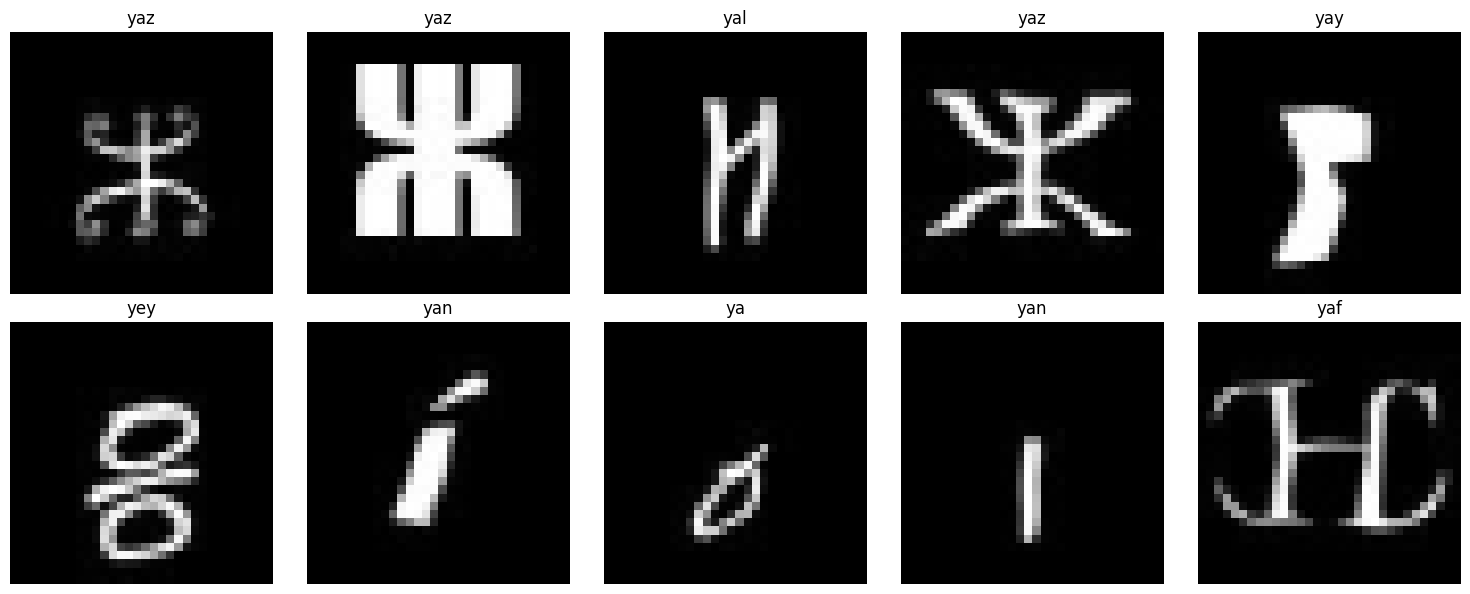


Building LeNet-5 model for 33 classes...

Model Architecture:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ C1 (Conv2D)                     │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S2 (AveragePooling2D)           │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C3 (Conv2D)                     │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S4 (AveragePooling2D)           │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C5 (Dense)                      │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ F6 (Dense)                      │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 33)             │         2,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,661 (248.68 KB)

 Trainable params: 63,661 (248.68 KB)

 Non-trainable params: 0 (0.00 B)


Starting training...
Epoch 1/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4185 - loss: 2.0933 - val_accuracy: 0.7313 - val_loss: 0.8999 - learning_rate: 0.0010
Epoch 2/50
635/635 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7821 - loss: 0.7605 - val_accuracy: 0.8470 - val_loss: 0.4985 - learning_rate: 0.0010
Epoch 3/50
186/635 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8815 - loss: 0.4309

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
from pathlib import Path

class TifinaghDataLoader:
    """Data loader for Tifinagh characters dataset"""

    def __init__(self, data_dir, target_size=(32, 32)):
        self.data_dir = data_dir
        self.target_size = target_size
        self.label_encoder = LabelEncoder()

    def load_dataset(self, test_size=0.2, validation_size=0.1):
        """Load and preprocess the Tifinagh dataset"""
        print(f"Loading dataset from: {self.data_dir}")

        images = []
        labels = []
        class_names = []

        # Get all class directories
        class_dirs = [d for d in os.listdir(self.data_dir)
                     if os.path.isdir(os.path.join(self.data_dir, d))]
        class_dirs.sort()

        print(f"Found {len(class_dirs)} classes: {class_dirs}")

        # Load images from each class
        for class_name in class_dirs:
            class_path = os.path.join(self.data_dir, class_name)
            class_images = []

            # Get all image files in the class directory
            image_files = []
            for ext in ['*.png', '*.jpg', '*.jpeg', '*.bmp', '*.tiff']:
                image_files.extend(Path(class_path).glob(ext))
                image_files.extend(Path(class_path).glob(ext.upper()))

            print(f"Class '{class_name}': {len(image_files)} images")

            for image_path in image_files:
                try:
                    # Load and preprocess image
                    image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
                    if image is not None:
                        # Resize to target size
                        image = cv2.resize(image, self.target_size)
                        # Normalize to [0, 1]
                        image = image.astype(np.float32) / 255.0

                        images.append(image)
                        labels.append(class_name)

                except Exception as e:
                    print(f"Error loading {image_path}: {e}")
                    continue

        if not images:
            raise ValueError("No images found in the dataset!")

        # Convert to numpy arrays
        X = np.array(images)
        y = np.array(labels)

        # Add channel dimension for grayscale images
        X = np.expand_dims(X, axis=-1)

        # Encode labels
        y_encoded = self.label_encoder.fit_transform(y)

        print(f"Dataset loaded: {X.shape[0]} images, {len(np.unique(y_encoded))} classes")
        print(f"Image shape: {X.shape[1:]}")

        # Split into train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=test_size, stratify=y_encoded, random_state=42
        )

        # Split train into train/validation
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=validation_size, stratify=y_train, random_state=42
        )

        # Convert labels to categorical
        num_classes = len(np.unique(y_encoded))
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_val = keras.utils.to_categorical(y_val, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        print(f"Train set: {X_train.shape[0]} samples")
        print(f"Validation set: {X_val.shape[0]} samples")
        print(f"Test set: {X_test.shape[0]} samples")

        return (X_train, y_train), (X_val, y_val), (X_test, y_test), num_classes

    def get_class_names(self):
        """Get class names"""
        return self.label_encoder.classes_

    def plot_sample_images(self, X, y, class_names, num_samples=10):
        """Plot sample images from the dataset"""
        fig, axes = plt.subplots(2, 5, figsize=(15, 6))
        axes = axes.ravel()

        for i in range(min(num_samples, len(X))):
            axes[i].imshow(X[i].squeeze(), cmap='gray')
            class_idx = np.argmax(y[i])
            axes[i].set_title(f'{class_names[class_idx]}')
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

class LeNet5Model:
    """Enhanced LeNet-5 CNN Architecture with detailed layer analysis"""

    def __init__(self, num_classes, input_shape=(32, 32, 1)):
        self.num_classes = num_classes
        self.input_shape = input_shape
        self.model = None
        self.history = None
        self.layer_models = {}  # Store individual layer models for analysis

    def build_model(self, activation='tanh'):
        """Build LeNet-5 architecture with layer-by-layer analysis capability"""

        model = keras.Sequential([
            # Input layer
            layers.Input(shape=self.input_shape),

            # C1: Convolution layer - 6 filters of 5×5
            layers.Conv2D(6, (5, 5), activation=activation, padding='valid', name='C1'),
            # Output: 28×28×6

            # S2: Average pooling 2×2
            layers.AveragePooling2D((2, 2), strides=2, name='S2'),
            # Output: 14×14×6

            # C3: Convolution layer - 16 filters of 5×5
            layers.Conv2D(16, (5, 5), activation=activation, padding='valid', name='C3'),
            # Output: 10×10×16

            # S4: Average pooling 2×2
            layers.AveragePooling2D((2, 2), strides=2, name='S4'),
            # Output: 5×5×16

            # Flatten for fully connected layers
            layers.Flatten(),

            # C5: Fully connected layer - 120 neurons
            layers.Dense(120, activation=activation, name='C5'),

            # F6: Fully connected layer - 84 neurons
            layers.Dense(84, activation=activation, name='F6'),

            # Output layer - num_classes neurons
            layers.Dense(self.num_classes, activation='softmax', name='Output')
        ])

        self.model = model
        # Don't create layer models here - wait until after compilation
        return model

    def _create_layer_models(self):
        """Create individual models for each layer to analyze outputs"""
        if self.model is None:
            return

        # Build the model if it hasn't been built yet
        if not self.model.built:
            # Build with a dummy input to initialize layers
            dummy_input = np.zeros((1,) + self.input_shape)
            _ = self.model(dummy_input)

        for i, layer in enumerate(self.model.layers):
            if isinstance(layer, (layers.Conv2D, layers.AveragePooling2D, layers.Dense)):
                try:
                    layer_model = keras.models.Model(
                        inputs=self.model.input,
                        outputs=layer.output,
                        name=f'model_to_{layer.name}'
                    )
                    self.layer_models[layer.name] = layer_model
                except Exception as e:
                    print(f"Warning: Could not create layer model for {layer.name}: {e}")
                    continue

    def compile_model(self, optimizer='adam', learning_rate=0.001):
        """Compile the model"""
        if optimizer == 'adam':
            opt = keras.optimizers.Adam(learning_rate=learning_rate)
        elif optimizer == 'sgd':
            opt = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
        else:
            opt = optimizer

        self.model.compile(
            optimizer=opt,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        # Create layer models after compilation
        self._create_layer_models()

    def train(self, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
        """Train the model"""

        # Callbacks
        callbacks = [
            keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            ),
            keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=5,
                min_lr=1e-7
            )
        ]

        # Train the model
        self.history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_val, y_val),
            callbacks=callbacks,
            verbose=1
        )

        return self.history

    def evaluate(self, X_test, y_test):
        """Evaluate the model"""
        return self.model.evaluate(X_test, y_test, verbose=0)

    def predict(self, X):
        """Make predictions"""
        return self.model.predict(X)

    def analyze_layer_by_layer_detailed(self, test_image, save_figures=False, figsize=(20, 15)):
        """
        Comprehensive layer-by-layer analysis showing each filter's effect
        """
        # Check if layer models exist, create them if not
        if not self.layer_models:
            print("Creating layer models for analysis...")
            self._create_layer_models()

        if not self.layer_models:
            print("Error: Could not create layer models. Make sure the model is compiled and trained.")
            return

        print("=" * 80)
        print("DETAILED LAYER-BY-LAYER FILTER ANALYSIS")
        print("=" * 80)

        # Prepare input
        if len(test_image.shape) == 2:
            test_image = np.expand_dims(test_image, axis=-1)
        if len(test_image.shape) == 3:
            test_image = np.expand_dims(test_image, axis=0)

        # Show original image
        plt.figure(figsize=(6, 6))
        plt.imshow(test_image[0].squeeze(), cmap='gray')
        plt.title('Original Input Image', fontsize=16, fontweight='bold')
        plt.axis('off')
        if save_figures:
            plt.savefig('00_original_image.png', dpi=150, bbox_inches='tight')
        plt.show()

        layer_count = 0

        for layer in self.model.layers:
            if isinstance(layer, (layers.Conv2D, layers.AveragePooling2D)):
                layer_count += 1

                # Get layer output
                layer_output = self.layer_models[layer.name].predict(test_image, verbose=0)

                print(f"\n{'='*60}")
                print(f"LAYER {layer_count}: {layer.name.upper()}")
                print(f"{'='*60}")
                print(f"Layer Type: {type(layer).__name__}")
                print(f"Input Shape: {layer.input_shape}")
                print(f"Output Shape: {layer.output_shape}")
                print(f"Number of Feature Maps: {layer_output.shape[-1]}")

                if isinstance(layer, layers.Conv2D):
                    filters, biases = layer.get_weights()
                    print(f"Filter Size: {filters.shape[:2]}")
                    print(f"Number of Filters: {filters.shape[-1]}")
                    print(f"Activation Function: {layer.activation.__name__}")

                    # Show filters first
                    self._visualize_individual_filters(layer, filters, layer_count, save_figures)

                # Show all feature maps for this layer
                self._visualize_all_feature_maps(layer_output, layer.name, layer_count, save_figures)

                # Show individual filter effects (for Conv layers)
                if isinstance(layer, layers.Conv2D):
                    self._analyze_individual_filter_effects(
                        test_image, layer, layer_count, save_figures
                    )

                # Statistical analysis
                self._analyze_layer_statistics(layer_output, layer.name)

                print(f"\n{'-'*60}")

        print(f"\n{'='*80}")
        print("ANALYSIS COMPLETE")
        print(f"{'='*80}")

    def _visualize_individual_filters(self, layer, filters, layer_count, save_figures):
        """Visualize individual convolutional filters"""
        print(f"\n📊 FILTERS VISUALIZATION FOR {layer.name}")

        n_filters = filters.shape[-1]
        n_cols = min(6, n_filters)
        n_rows = (n_filters + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
        if n_filters == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes.reshape(1, -1)

        # Normalize filters for visualization
        f_min, f_max = filters.min(), filters.max()
        filters_norm = (filters - f_min) / (f_max - f_min)

        for i in range(n_filters):
            row = i // n_cols
            col = i % n_cols

            if n_rows == 1:
                ax = axes[col] if n_filters > 1 else axes[0]
            else:
                ax = axes[row, col]

            # For grayscale input, show the first (and only) input channel
            filter_img = filters_norm[:, :, 0, i] if filters.shape[2] == 1 else filters_norm[:, :, :, i]

            im = ax.imshow(filter_img, cmap='RdBu_r', vmin=0, vmax=1)
            ax.set_title(f'Filter {i+1}', fontsize=10)
            ax.axis('off')

            # Add colorbar for each filter
            plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

        # Hide empty subplots
        for i in range(n_filters, n_rows * n_cols):
            row = i // n_cols
            col = i % n_cols
            if n_rows == 1:
                axes[col].set_visible(False)
            else:
                axes[row, col].set_visible(False)

        plt.suptitle(f'Layer {layer_count}: {layer.name} - Individual Filters',
                    fontsize=14, fontweight='bold')
        plt.tight_layout()
        if save_figures:
            plt.savefig(f'{layer_count:02d}_filters_{layer.name}.png', dpi=150, bbox_inches='tight')
        plt.show()

    def _visualize_all_feature_maps(self, layer_output, layer_name, layer_count, save_figures):
        """Visualize all feature maps from a layer"""
        print(f"\n🗺️  FEATURE MAPS FOR {layer_name}")

        n_features = layer_output.shape[-1]
        n_cols = min(8, n_features)
        n_rows = (n_features + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))
        if n_features == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes.reshape(1, -1)

        for i in range(n_features):
            row = i // n_cols
            col = i % n_cols

            if n_rows == 1:
                ax = axes[col] if n_features > 1 else axes[0]
            else:
                ax = axes[row, col]

            feature_map = layer_output[0, :, :, i]

            im = ax.imshow(feature_map, cmap='viridis')
            ax.set_title(f'Feature Map {i+1}\nMin: {feature_map.min():.3f}, Max: {feature_map.max():.3f}',
                        fontsize=9)
            ax.axis('off')

            # Add colorbar
            plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

        # Hide empty subplots
        for i in range(n_features, n_rows * n_cols):
            row = i // n_cols
            col = i % n_cols
            if n_rows == 1:
                axes[col].set_visible(False)
            else:
                axes[row, col].set_visible(False)

        plt.suptitle(f'Layer {layer_count}: {layer_name} - All Feature Maps',
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        if save_figures:
            plt.savefig(f'{layer_count:02d}_featuremaps_{layer_name}.png', dpi=150, bbox_inches='tight')
        plt.show()

    def _analyze_individual_filter_effects(self, test_image, layer, layer_count, save_figures):
        """Analyze the effect of each individual filter"""
        print(f"\n🔍 INDIVIDUAL FILTER EFFECTS FOR {layer.name}")

        # Create a model that outputs just before and after this layer
        layer_index = None
        for i, l in enumerate(self.model.layers):
            if l.name == layer.name:
                layer_index = i
                break

        if layer_index is None or layer_index == 0:
            return

        try:
            # Get input to this layer
            prev_layer = self.model.layers[layer_index - 1]
            input_to_layer_model = keras.models.Model(
                inputs=self.model.input,
                outputs=prev_layer.output
            )

            layer_input = input_to_layer_model.predict(test_image, verbose=0)

            # Get the layer's weights
            filters, biases = layer.get_weights()

            # Apply each filter individually
            n_filters = filters.shape[-1]

            # Create visualization
            n_cols = min(4, n_filters)
            n_rows = (n_filters + n_cols - 1) // n_cols

            fig, axes = plt.subplots(n_rows, n_cols * 2, figsize=(20, 4*n_rows))
            if n_rows == 1:
                axes = axes.reshape(1, -1)

            for f in range(n_filters):
                # Apply single filter
                single_filter = np.zeros_like(filters)
                single_filter[:, :, :, f] = filters[:, :, :, f]

                # Create temporary layer with single filter
                temp_layer = layers.Conv2D(
                    1, filters.shape[:2],
                    activation=layer.activation,
                    padding='valid',
                    use_bias=True
                )

                # Build temporary model
                temp_input = keras.layers.Input(shape=layer_input.shape[1:])
                temp_output = temp_layer(temp_input)
                temp_model = keras.models.Model(temp_input, temp_output)

                # Set weights (single filter)
                temp_layer.set_weights([
                    single_filter[:, :, :, f:f+1],
                    biases[f:f+1]
                ])

                # Get output
                single_filter_output = temp_model.predict(layer_input, verbose=0)

                # Plot filter and its output
                row = f // n_cols
                col_filter = (f % n_cols) * 2
                col_output = col_filter + 1

                # Plot filter
                ax_filter = axes[row, col_filter]
                filter_img = filters[:, :, 0, f]  # Assuming single channel input
                im1 = ax_filter.imshow(filter_img, cmap='RdBu_r')
                ax_filter.set_title(f'Filter {f+1}', fontsize=10)
                ax_filter.axis('off')
                plt.colorbar(im1, ax=ax_filter, fraction=0.046, pad=0.04)

                # Plot output
                ax_output = axes[row, col_output]
                output_img = single_filter_output[0, :, :, 0]
                im2 = ax_output.imshow(output_img, cmap='viridis')
                ax_output.set_title(f'Output {f+1}\nRange: [{output_img.min():.3f}, {output_img.max():.3f}]',
                                  fontsize=10)
                ax_output.axis('off')
                plt.colorbar(im2, ax=ax_output, fraction=0.046, pad=0.04)

            # Hide empty subplots
            total_subplots = n_rows * n_cols * 2
            for i in range(n_filters * 2, total_subplots):
                row = i // (n_cols * 2)
                col = i % (n_cols * 2)
                axes[row, col].set_visible(False)

            plt.suptitle(f'Layer {layer_count}: {layer.name} - Individual Filter Effects',
                        fontsize=16, fontweight='bold')
            plt.tight_layout()
            if save_figures:
                plt.savefig(f'{layer_count:02d}_individual_effects_{layer.name}.png', dpi=150, bbox_inches='tight')
            plt.show()

        except Exception as e:
            print(f"Error analyzing individual filter effects for {layer.name}: {e}")
            print("Skipping individual filter analysis for this layer.")

    def _analyze_layer_statistics(self, layer_output, layer_name):
        """Analyze statistics for each feature map"""
        print(f"\n📈 STATISTICS FOR {layer_name}")
        print("-" * 40)

        n_features = layer_output.shape[-1]
        stats = []

        for i in range(n_features):
            feature_map = layer_output[0, :, :, i]
            stats.append({
                'Feature': i+1,
                'Mean': feature_map.mean(),
                'Std': feature_map.std(),
                'Min': feature_map.min(),
                'Max': feature_map.max(),
                'Sparsity': (feature_map == 0).sum() / feature_map.size
            })

        # Print statistics
        print(f"{'Feature':<8} {'Mean':<8} {'Std':<8} {'Min':<8} {'Max':<8} {'Sparsity':<8}")
        print("-" * 60)
        for stat in stats:
            print(f"{stat['Feature']:<8} {stat['Mean']:<8.3f} {stat['Std']:<8.3f} "
                  f"{stat['Min']:<8.3f} {stat['Max']:<8.3f} {stat['Sparsity']:<8.3f}")

    def compare_multiple_images(self, test_images, class_names, true_labels, save_figures=False):
        """Compare layer outputs across multiple images"""
        # Check if layer models exist, create them if not
        if not self.layer_models:
            print("Creating layer models for analysis...")
            self._create_layer_models()

        if not self.layer_models:
            print("Error: Could not create layer models. Make sure the model is compiled and trained.")
            return

        print("\n" + "="*80)
        print("COMPARING LAYER OUTPUTS ACROSS MULTIPLE IMAGES")
        print("="*80)

        n_images = len(test_images)

        for layer in self.model.layers:
            if isinstance(layer, (layers.Conv2D, layers.AveragePooling2D)):
                print(f"\n📊 Layer: {layer.name}")

                # Get outputs for all images
                all_outputs = []
                for img in test_images:
                    if len(img.shape) == 2:
                        img = np.expand_dims(img, axis=-1)
                    if len(img.shape) == 3:
                        img = np.expand_dims(img, axis=0)
                    output = self.layer_models[layer.name].predict(img, verbose=0)
                    all_outputs.append(output[0])

                # Visualize first feature map for each image
                fig, axes = plt.subplots(2, n_images, figsize=(4*n_images, 8))

                for i in range(n_images):
                    # Original image
                    axes[0, i].imshow(test_images[i].squeeze(), cmap='gray')
                    axes[0, i].set_title(f'Original\n{class_names[true_labels[i]]}')
                    axes[0, i].axis('off')

                    # Feature map
                    axes[1, i].imshow(all_outputs[i][:, :, 0], cmap='viridis')
                    axes[1, i].set_title(f'{layer.name}\nFeature Map 1')
                    axes[1, i].axis('off')

                plt.suptitle(f'Comparison: {layer.name} - First Feature Map',
                           fontsize=14, fontweight='bold')
                plt.tight_layout()
                if save_figures:
                    plt.savefig(f'comparison_{layer.name}.png', dpi=150, bbox_inches='tight')
                plt.show()

    def plot_training_history(self):
        """Plot training history"""
        if self.history is None:
            print("No training history available!")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot training & validation accuracy
        ax1.plot(self.history.history['accuracy'], label='Training Accuracy')
        ax1.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        ax1.set_title('Model Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        ax1.grid(True)

        # Plot training & validation loss
        ax2.plot(self.history.history['loss'], label='Training Loss')
        ax2.plot(self.history.history['val_loss'], label='Validation Loss')
        ax2.set_title('Model Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

    def save_model(self, filepath):
        """Save the trained model"""
        self.model.save(filepath)
        print(f"Model saved to {filepath}")

    def load_model(self, filepath):
        """Load a trained model"""
        self.model = keras.models.load_model(filepath)
        self._create_layer_models()  # Recreate layer models for analysis
        print(f"Model loaded from {filepath}")

def main():
    """Enhanced main training pipeline with detailed analysis"""

    # Dataset configuration
    data_dir = os.path.join(os.getcwd(), 'amhcd-data-64/tifinagh-images/')
    print(f"Dataset directory: {data_dir}")
    print(f"Current working directory: {os.getcwd()}")

    # Check if dataset exists
    if not os.path.exists(data_dir):
        print(f"Dataset directory not found: {data_dir}")
        print("Please make sure the dataset is in the correct location.")
        return

    # Load dataset
    data_loader = TifinaghDataLoader(data_dir, target_size=(32, 32))

    try:
        (X_train, y_train), (X_val, y_val), (X_test, y_test), num_classes = data_loader.load_dataset()
        class_names = data_loader.get_class_names()

        print(f"\nDataset Summary:")
        print(f"Number of classes: {num_classes}")
        print(f"Class names: {class_names}")

        # Plot sample images
        print("\nDisplaying sample images...")
        data_loader.plot_sample_images(X_train, y_train, class_names)

        # Create and build model
        print(f"\nBuilding LeNet-5 model for {num_classes} classes...")
        lenet = LeNet5Model(num_classes=num_classes)

        # Build with tanh activation (original LeNet-5)
        model = lenet.build_model(activation='tanh')

        # Print model architecture
        print("\nModel Architecture:")
        model.summary()

        # Compile model
        lenet.compile_model(optimizer='adam', learning_rate=0.001)

        # Train model
        print("\nStarting training...")
        history = lenet.train(
            X_train, y_train,
            X_val, y_val,
            epochs=50,
            batch_size=32
        )

        # Plot training history
        lenet.plot_training_history()

        # Evaluate on test set
        print("\nEvaluating on test set...")
        test_loss, test_accuracy = lenet.evaluate(X_test, y_test)
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}")

        # DETAILED LAYER-BY-LAYER ANALYSIS
        print("\n" + "="*80)
        print("STARTING DETAILED LAYER-BY-LAYER ANALYSIS")
        print("="*80)

        # Select a test image for detailed analysis
        test_sample_idx = 0
        test_image = X_test[test_sample_idx]
        true_label = class_names[np.argmax(y_test[test_sample_idx])]

        print(f"Analyzing test image from class: {true_label}")

        # Perform detailed analysis
        lenet.analyze_layer_by_layer_detailed(
            test_image,
            save_figures=True,  # Set to True to save all figures
            figsize=(20, 15)
        )

        # Compare multiple images
        print("\n" + "="*60)
        print("COMPARING DIFFERENT CLASSES")
        print("="*60)

        # Select 5 different test images from different classes
        selected_indices = []
        selected_classes = []
        used_classes = set()

        for i, label in enumerate(y_test):
            class_idx = np.argmax(label)
            if class_idx not in used_classes and len(selected_indices) < 5:
                selected_indices.append(i)
                selected_classes.append(class_idx)
                used_classes.add(class_idx)

        selected_images = [X_test[i] for i in selected_indices]
        lenet.compare_multiple_images(
            selected_images,
            class_names,
            selected_classes,
            save_figures=True
        )

        # Save model
        model_path = 'lenet5_tifinagh_model.h5'
        lenet.save_model(model_path)

        print(f"\n{'='*80}")
        print("ANALYSIS COMPLETED SUCCESSFULLY!")
        print(f"Model saved as: {model_path}")
        print("All analysis figures have been saved as PNG files.")
        print(f"{'='*80}")

    except Exception as e:
        print(f"Error during training: {e}")
        print("Please check your dataset structure and file paths.")

if __name__ == "__main__":
    main()